# Stock trading bot
The objective of this notebook is to developp a stock trading bot, and test its efficency.

## Purpose
Get moooney

## Methodology
We will proceed in several steps: 
1. Identifying in which stocks to invest, using social media and yahoo finance
2. Get live data about those stocks
3. Come up with a method to know when to buy and sell our stocks
4. Testing our bot!

## Results


## Suggested next steps
- Improve initialtization while using other market's data
- Improving how I choose the amount to invest
- Try woth cryptocurrencies on reddit, as then are maybe more related to popularity
- Test other methodologies than MACD
- Test twitter to identify stocks
- Take into account buying and selling fees to brokers
- Use which tickers brought the more money to train a ML model to improve their choosing
- Put in place buying and selling tracking, to be able to compare it with the actual values at the end of the day
- Add a way to track earnings per stock
- improve MACD

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

#To parse reddit
import praw
import asyncpraw

#For the sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

#For NYSE date issues
from datetime import datetime, timezone, date, timedelta
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import schedule 
import time 
from datetime import datetime
import pytz

#To parse yahoo finance
import requests
from bs4 import BeautifulSoup

#To get stock data
from yahoo_fin import stock_info as si #Very useful, dig into their methods
import yfinance as yf
plt.style.use("fivethirtyeight")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Choosing which stocks we will follow

## Couting ticker occurences and trends on social media

In a first time, we will create stock names, tickers, and words that are used in trading posts

In [2]:
'''includes US stock symbols with market cap > 100 Million, and price above $3. 
Download the csv file  https://www.nasdaq.com/market-activity/stocks/screener?exchange=nasdaq&letter=0&render=download 
of all the NYSE, NASDAQ and NYSEAMERICAN public traded companies.
'''
us = {
    'A', 'AA', 'AACQ', 'AAIC', 'AAL', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAWW', 'AAXN', 'AB', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCL', 'ABCM', 'ABEV', 'ABG', 'ABM', 'ABMD', 'ABNB', 'ABR', 'ABST', 'ABT', 'ABTX', 'ABUS', 'AC', 'ACA', 'ACAC', 'ACAD', 'ACAM', 'ACB', 'ACBI', 'ACC', 'ACCD', 'ACCO', 'ACEL', 'ACET', 'ACEV', 'ACGL', 'ACH', 'ACHC', 'ACI', 'ACIA', 'ACIC', 'ACIU', 'ACIW', 'ACLS', 'ACM', 'ACMR', 'ACN', 'ACNB', 'ACND', 'ACP', 'ACRE', 'ACRS', 'ACTC', 'ACTG', 'ACU', 'ACV', 'ADAP', 'ADBE', 'ADC', 'ADCT', 'ADES', 'ADI', 'ADM', 'ADMS', 'ADNT', 'ADOC', 'ADP', 'ADPT', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADUS', 'ADV', 'ADVM', 'ADX', 'AE', 'AEE', 'AEF', 'AEG', 'AEGN', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEP', 'AER', 'AERI', 'AES', 'AEYE', 'AFB', 'AFG', 'AFIB', 'AFIN', 'AFL', 'AFMD', 'AFT', 'AFYA', 'AG', 'AGC', 'AGCO', 'AGD', 'AGEN', 'AGI', 'AGIO', 'AGLE', 'AGM', 'AGMH', 'AGNC', 'AGO', 'AGR', 'AGRO', 'AGS', 'AGTC', 'AGX', 'AGYS', 'AHAC', 'AHCO', 'AHH', 'AI', 'AIF', 'AIG', 'AIH', 'AIMC', 'AIN', 'AINV', 'AIO', 'AIR', 'AIRC', 'AIRG', 'AIT', 'AIV', 'AIZ', 'AJAX', 'AJG', 'AJRD', 'AJX', 'AKAM', 'AKR', 'AKRO', 'AKTS', 'AKU', 'AKUS', 'AL', 'ALB', 'ALBO', 'ALC', 'ALCO', 'ALDX', 'ALE', 'ALEC', 'ALEX', 'ALG', 'ALGM', 'ALGN', 'ALGS', 'ALGT', 'ALK', 'ALKS', 'ALL', 'ALLE', 'ALLK', 'ALLO', 'ALLT', 'ALLY', 'ALNY', 'ALPN', 'ALRM', 'ALRS', 'ALSK', 'ALSN', 'ALT', 'ALTA', 'ALTG', 'ALTM', 'ALTR', 'ALUS', 'ALV', 'ALVR', 'ALX', 'ALXN', 'ALXO', 'AM', 'AMAL', 'AMAT', 'AMBA', 'AMBC', 'AMCI', 'AMCR', 'AMCX', 'AMD', 'AME', 'AMED', 'AMEH', 'AMG', 'AMGN', 'AMH', 'AMHC', 'AMK', 'AMKR', 'AMN', 'AMNB', 'AMOT', 'AMOV', 'AMP', 'AMPH', 'AMRC', 'AMRK', 'AMRN', 'AMRS', 'AMRX', 'AMSC', 'AMSF', 'AMSWA', 'AMT', 'AMTB', 'AMTBB', 'AMTI', 'AMWD', 'AMWL', 'AMX', 'AMYT', 'AMZN', 'AN', 'ANAB', 'ANAT', 'ANDE', 'ANET', 'ANF', 'ANGI', 'ANGO', 'ANIK', 'ANIP', 'ANNX', 'ANSS', 'ANTM', 'AOD', 'AON', 'AONE', 'AOS', 'AOSL', 'AOUT', 'AP', 'APA', 'APAM', 'APD', 'APEI', 'APG', 'APH', 'APHA', 'API', 'APLE', 'APLS', 'APLT', 'APO', 'APOG', 'APPF', 'APPN', 'APPS', 'APRE', 'APSG', 'APT', 'APTO', 'APTS', 'APTV', 'APTX', 'APVO', 'APXT', 'APYX', 'AQB', 'AQMS', 'AQN', 'AQST', 'AQUA', 'AR', 'ARA', 'ARAY', 'ARCB', 'ARCC', 'ARCE', 'ARCH', 'ARCO', 'ARCT', 'ARD', 'ARDC', 'ARDX', 'ARE', 'ARES', 'ARGO', 'ARGX', 'ARI', 'ARL', 'ARLO', 'ARLP', 'ARMK', 'ARNA', 'ARNC', 'AROC', 'AROW', 'ARQT', 'ARR', 'ARRY', 'ARTNA', 'ARVN', 'ARW', 'ARWR', 'ARYA', 'ASA', 'ASAN', 'ASAQ', 'ASB', 'ASC', 'ASG', 'ASGN', 'ASH', 'ASIX', 'ASLE', 'ASMB', 'ASML', 'ASND', 'ASO', 'ASPL', 'ASPN', 'ASPS', 'ASPU', 'ASR', 'ASTE', 'ASUR', 'ASX', 'ATAC', 'ATAX', 'ATCO', 'ATEC', 'ATEN', 'ATEX', 'ATGE', 'ATH', 'ATHA', 'ATHM', 'ATI', 'ATKR', 'ATLC', 'ATLO', 'ATNI', 'ATNM', 'ATNX', 'ATO', 'ATOM', 'ATR', 'ATRA', 'ATRC', 'ATRI', 'ATRO', 'ATRS', 'ATSG', 'ATTO', 'ATUS', 'ATVI', 'AU', 'AUB', 'AUBN', 'AUDC', 'AUPH', 'AUTL', 'AUY', 'AVA', 'AVAL', 'AVAN', 'AVAV', 'AVB', 'AVCT', 'AVD', 'AVDL', 'AVEO', 'AVGO', 'AVID', 'AVIR', 'AVK', 'AVLR', 'AVNS', 'AVNT', 'AVNW', 'AVO', 'AVRO', 'AVT', 'AVTR', 'AVXL', 'AVY', 'AVYA', 'AWF', 'AWH', 'AWI', 'AWK', 'AWP', 'AWR', 'AX', 'AXDX', 'AXGN', 'AXL', 'AXLA', 'AXNX', 'AXP', 'AXS', 'AXSM', 'AXTA', 'AXTI', 'AXU', 'AY', 'AYI', 'AYLA', 'AYRO', 'AYTU', 'AYX', 'AZEK', 'AZN', 'AZO', 'AZPN', 'AZRE', 'AZUL', 'AZYO', 'AZZ', 'B', 'BA', 'BABA', 'BAC', 'BAF', 'BAH', 'BAK', 'BALY', 'BAM', 'BANC', 'BAND', 'BANF', 'BANR', 'BANX', 'BAP', 'BASI', 'BATL', 'BATRA', 'BATRK', 'BAX', 'BB', 'BBAR', 'BBBY', 'BBCP', 'BBD', 'BBDC', 'BBDO', 'BBF', 'BBIO', 'BBK', 'BBL', 'BBN', 'BBSI', 'BBU', 'BBVA', 'BBY', 'BC', 'BCAB', 'BCAT', 'BCBP', 'BCC', 'BCE', 'BCEI', 'BCEL', 'BCH', 'BCLI', 'BCML', 'BCO', 'BCOR', 'BCOV', 'BCPC', 'BCRX', 'BCS', 'BCSF', 'BCTG', 'BCV', 'BCX', 'BCYC', 'BDC', 'BDGE', 'BDJ', 'BDN', 'BDSI', 'BDSX', 'BDTX', 'BDX', 'BE', 'BEAM', 'BEAT', 'BECN', 'BEDU', 'BEEM', 'BEKE', 'BELFA', 'BELFB', 'BEN', 'BEP', 'BEPC', 'BERY', 'BFAM', 'BFC', 'BFI', 'BFIN', 'BFK', 'BFRA', 'BFS', 'BFST', 'BFT', 'BFZ', 'BG', 'BGB', 'BGCP', 'BGFV', 'BGH', 'BGIO', 'BGNE', 'BGR', 'BGS', 'BGSF', 'BGT', 'BGX', 'BGY', 'BH', 'BHB', 'BHC', 'BHE', 'BHF', 'BHK', 'BHLB', 'BHP', 'BHR', 'BHVN', 'BIDU', 'BIF', 'BIG', 'BIGC', 'BIIB', 'BILI', 'BILL', 'BIO', 'BIOX', 'BIP', 'BIPC', 'BIT', 'BIVI', 'BJ', 'BJRI', 'BK', 'BKD', 'BKE', 'BKH', 'BKI', 'BKN', 'BKNG', 'BKR', 'BKT', 'BKU', 'BL', 'BLBD', 'BLCT', 'BLD', 'BLDP', 'BLDR', 'BLE', 'BLFS', 'BLI', 'BLK', 'BLKB', 'BLL', 'BLMN', 'BLNK', 'BLSA', 'BLU', 'BLUE', 'BLW', 'BLX', 'BMA', 'BMCH', 'BME', 'BMI', 'BMO', 'BMRC', 'BMRN', 'BMTC', 'BMY', 'BNED', 'BNFT', 'BNGO', 'BNL', 'BNR', 'BNS', 'BNTX', 'BNY', 'BOAC', 'BOCH', 'BOE', 'BOH', 'BOKF', 'BOMN', 'BOOM', 'BOOT', 'BOWX', 'BOX', 'BP', 'BPFH', 'BPMC', 'BPMP', 'BPOP', 'BPRN', 'BPY', 'BPYU', 'BQ', 'BR', 'BRBR', 'BRBS', 'BRC', 'BREZ', 'BRFS', 'BRG', 'BRID', 'BRKL', 'BRKR', 'BRKS', 'BRMK', 'BRO', 'BROG', 'BRP', 'BRT', 'BRX', 'BRY', 'BSAC', 'BSBK', 'BSBR', 'BSD', 'BSET', 'BSGM', 'BSIG', 'BSL', 'BSM', 'BSMX', 'BSRR', 'BST', 'BSTZ', 'BSVN', 'BSX', 'BSY', 'BTA', 'BTAI', 'BTAQ', 'BTAQU', 'BTBT', 'BTG', 'BTI', 'BTO', 'BTT', 'BTWN', 'BTZ', 'BUD', 'BUFF', 'BUI', 'BUR', 'BURL', 'BUSE', 'BV', 'BVH', 'BVN', 'BW', 'BWA', 'BWB', 'BWEN', 'BWFG', 'BWG', 'BWMX', 'BWXT', 'BX', 'BXC', 'BXG', 'BXMT', 'BXMX', 'BXP', 'BXS', 'BY', 'BYD', 'BYM', 'BYND', 'BYSI', 'BZH', 'BZUN', 'C', 'CAAP', 'CAAS', 'CABA', 'CABO', 'CAC', 'CACC', 'CACI', 'CADE', 'CAE', 'CAF', 'CAG', 'CAH', 'CAI', 'CAJ', 'CAKE', 'CAL', 'CALA', 'CALB', 'CALM', 'CALT', 'CALX', 'CAMP', 'CAMT', 'CAN', 'CANG', 'CAPA', 'CAPL', 'CAR', 'CARA', 'CARE', 'CARG', 'CARR', 'CARS', 'CASA', 'CASH', 'CASS', 'CASY', 'CAT', 'CATC', 'CATM', 'CATO', 'CATY', 'CB', 'CBAN', 'CBAT', 'CBAY', 'CBB', 'CBD', 'CBFV', 'CBH', 'CBIO', 'CBMG', 'CBNK', 'CBOE', 'CBPO', 'CBRE', 'CBRL', 'CBSH', 'CBT', 'CBTX', 'CBU', 'CBZ', 'CC', 'CCAC', 'CCAP', 'CCB', 'CCBG', 'CCC', 'CCCC', 'CCD', 'CCEP', 'CCF', 'CCI', 'CCIV', 'CCJ', 'CCK', 'CCL', 'CCMP', 'CCNE', 'CCOI', 'CCRN', 'CCS', 'CCU', 'CCX', 'CCXI', 'CD', 'CDAK', 'CDAY', 'CDE', 'CDK', 'CDLX', 'CDMO', 'CDNA', 'CDNS', 'CDR', 'CDW', 'CDXC', 'CDXS', 'CDZI', 'CE', 'CEA', 'CECE', 'CEE', 'CEIX', 'CEL', 'CELH', 'CEM', 'CENT', 'CENTA', 'CENX', 'CEO', 'CEQP', 'CERE', 'CERN', 'CERS', 'CERT', 'CET', 'CEVA', 'CF', 'CFB', 'CFBK', 'CFFI', 'CFFN', 'CFG', 'CFII', 'CFR', 'CFRX', 'CFX', 'CG', 'CGBD', 'CGC', 'CGEN', 'CGNX', 'CGO', 'CGRO', 'CHA', 'CHAQ', 'CHCO', 'CHCT', 'CHD', 'CHDN', 'CHE', 'CHEF', 'CHGG', 'CHH', 'CHI', 'CHKP', 'CHL', 'CHMA', 'CHMG', 'CHMI', 'CHN', 'CHNG', 'CHPM', 'CHRS', 'CHRW', 'CHT', 'CHTR', 'CHU', 'CHUY', 'CHW', 'CHWY', 'CHX', 'CHY', 'CI', 'CIA', 'CIB', 'CIEN', 'CIGI', 'CII', 'CIIC', 'CIK', 'CIM', 'CINF', 'CINR', 'CIO', 'CIR', 'CIT', 'CIVB', 'CIX', 'CIXX', 'CIZN', 'CKH', 'CL', 'CLA', 'CLAR', 'CLB', 'CLBK', 'CLCT', 'CLDR', 'CLDT', 'CLDX', 'CLF', 'CLFD', 'CLGX', 'CLH', 'CLI', 'CLII', 'CLLS', 'CLM', 'CLMT', 'CLNC', 'CLNE', 'CLNY', 'CLPR', 'CLPT', 'CLR', 'CLS', 'CLSK', 'CLVR', 'CLVS', 'CLW', 'CLX', 'CLXT', 'CM', 'CMA', 'CMBM', 'CMC', 'CMCL', 'CMCO', 'CMCSA', 'CMCT', 'CMD', 'CME', 'CMG', 'CMI', 'CMLF', 'CMLS', 'CMO', 'CMP', 'CMPI', 'CMPR', 'CMPS', 'CMRE', 'CMRX', 'CMS', 'CMT', 'CMTL', 'CMU', 'CNA', 'CNBKA', 'CNC', 'CNCE', 'CNDT', 'CNF', 'CNHI', 'CNI', 'CNK', 'CNMD', 'CNNE', 'CNO', 'CNOB', 'CNP', 'CNQ', 'CNR', 'CNS', 'CNSL', 'CNST', 'CNTG', 'CNTY', 'CNX', 'CNXC', 'CNXN', 'CO', 'CODI', 'CODX', 'COE', 'COF', 'COFS', 'COG', 'COGT', 'COHR', 'COHU', 'COKE', 'COLB', 'COLD', 'COLL', 'COLM', 'COMM', 'CONE', 'CONN', 'COO', 'COOP', 'COP', 'COR', 'CORE', 'CORT', 'COST', 'COTY', 'COUP', 'COWN', 'CP', 'CPA', 'CPAC', 'CPB', 'CPE', 'CPF', 'CPK', 'CPLG', 'CPLP', 'CPRI', 'CPRT', 'CPRX', 'CPS', 'CPSI', 'CPSR', 'CPST', 'CPT', 'CQP', 'CR', 'CRAI', 'CRC', 'CRDF', 'CREE', 'CRESY', 'CRF', 'CRH', 'CRHC', 'CRI', 'CRIS', 'CRK', 'CRL', 'CRM', 'CRMD', 'CRMT', 'CRNC', 'CRNX', 'CRON', 'CROX', 'CRS', 'CRSA', 'CRSP', 'CRSR', 'CRTO', 'CRTX', 'CRUS', 'CRVL', 'CRWD', 'CRY', 'CS', 'CSBR', 'CSCO', 'CSGP', 'CSGS', 'CSII', 'CSIQ', 'CSL', 'CSOD', 'CSPR', 'CSQ', 'CSR', 'CSSE', 'CSTE', 'CSTL', 'CSTM', 'CSTR', 'CSV', 'CSWC', 'CSWI', 'CSX', 'CTAC', 'CTAS', 'CTB', 'CTBI', 'CTIC', 'CTLT', 'CTMX', 'CTO', 'CTR', 'CTRA', 'CTRE', 'CTRN', 'CTS', 'CTSH', 'CTSO', 'CTT', 'CTVA', 'CTXS', 'CUB', 'CUBE', 'CUBI', 'CUE', 'CUK', 'CULP', 'CURI', 'CURO', 'CUTR', 'CUZ', 'CVA', 'CVAC', 'CVBF', 'CVCO', 'CVCY', 'CVE', 'CVEO', 'CVET', 'CVGI', 'CVGW', 'CVI', 'CVLB', 'CVLG', 'CVLT', 'CVLY', 'CVM', 'CVNA', 'CVS', 'CVX', 'CW', 'CWCO', 'CWEN', 'CWH', 'CWK', 'CWST', 'CWT', 'CX', 'CXDO', 'CXE', 'CXO', 'CXP', 'CXW', 'CYAD', 'CYBE', 'CYBR', 'CYCN', 'CYD', 'CYH', 'CYRX', 'CYTK', 'CZNC', 'CZR', 'CZWI', 'CZZ', 'D', 'DAC', 'DADA', 'DAKT', 'DAL', 'DAN', 'DAO', 'DAR', 'DASH', 'DAVA', 'DB', 'DBD', 'DBDR', 'DBI', 'DBL', 'DBX', 'DCBO', 'DCF', 'DCI', 'DCO', 'DCOM', 'DCP', 'DCPH', 'DCRB', 'DCT', 'DCTH', 'DD', 'DDD', 'DDOG', 'DDS', 'DE', 'DEA', 'DECK', 'DEH', 'DEI', 'DELL', 'DEN', 'DENN', 'DEO', 'DESP', 'DEX', 'DFHT', 'DFIN', 'DFNS', 'DFP', 'DFPH', 'DFS', 'DG', 'DGICA', 'DGICB', 'DGII', 'DGNR', 'DGNS', 'DGX', 'DHC', 'DHF', 'DHI', 'DHIL', 'DHR', 'DHT', 'DIAX', 'DIN', 'DIOD', 'DIS', 'DISCA', 'DISCB', 'DISCK', 'DISH', 'DJCO', 'DK', 'DKL', 'DKNG', 'DKS', 'DL', 'DLA', 'DLB', 'DLHC', 'DLR', 'DLTH', 'DLTR', 'DLX', 'DM', 'DMAC', 'DMB', 'DMF', 'DMLP', 'DMO', 'DMRC', 'DMS', 'DMTK', 'DMYD', 'DNB', 'DNLI', 'DNOW', 'DNP', 'DOC', 'DOCU', 'DOMO', 'DOOO', 'DOOR', 'DORM', 'DOV', 'DOW', 'DOX', 'DOYU', 'DPG', 'DPZ', 'DQ', 'DRD', 'DRE', 'DRH', 'DRI', 'DRIO', 'DRNA', 'DRQ', 'DSAC', 'DSGX', 'DSKE', 'DSL', 'DSM', 'DSPG', 'DSSI', 'DSU', 'DT', 'DTE', 'DTF', 'DTIL', 'DUC', 'DUK', 'DUO', 'DVA', 'DVAX', 'DVN', 'DX', 'DXC', 'DXCM', 'DXPE', 'DY', 'DYAI', 'DYN', 'DZSI', 'E', 'EA', 'EAD', 'EAF', 'EAR', 'EARN', 'EAT', 'EB', 'EBAY', 'EBC', 'EBF', 'EBIX', 'EBMT', 'EBON', 'EBR', 'EBS', 'EBSB', 'EBTC', 'EC', 'ECC', 'ECF', 'ECHO', 'ECL', 'ECOL', 'ECOM', 'ECPG', 'ED', 'EDAP', 'EDD', 'EDF', 'EDIT', 'EDN', 'EDU', 'EDUC', 'EEFT', 'EEX', 'EFC', 'EFF', 'EFL', 'EFR', 'EFSC', 'EFT', 'EFX', 'EGAN', 'EGBN', 'EGHT', 'EGLE', 'EGO', 'EGOV', 'EGP', 'EGRX', 'EH', 'EHC', 'EHI', 'EHT', 'EHTH', 'EIDX', 'EIG', 'EIGI', 'EIGR', 'EIM', 'EIX', 'EL', 'ELA', 'ELAN', 'ELF', 'ELLO', 'ELOX', 'ELP', 'ELS', 'ELVT', 'ELY', 'EMD', 'EME', 'EMF', 'EMKR', 'EML', 'EMN', 'EMO', 'EMPW', 'EMR', 'EMX', 'ENB', 'ENBL', 'ENDP', 'ENIA', 'ENIC', 'ENLC', 'ENLV', 'ENPC', 'ENPH', 'ENR', 'ENS', 'ENSG', 'ENTA', 'ENTG', 'ENV', 'ENVA', 'ENX', 'EOD', 'EOG', 'EOI', 'EOLS', 'EOS', 'EOSE', 'EOT', 'EPAC', 'EPAM', 'EPAY', 'EPC', 'EPD', 'EPIX', 'EPR', 'EPRT', 'EPZM', 'EQ', 'EQBK', 'EQC', 'EQD', 'EQH', 'EQIX', 'EQNR', 'EQOS', 'EQR', 'EQT', 'EQX', 'ERC', 'ERES', 'ERF', 'ERH', 'ERIC', 'ERIE', 'ERII', 'ERJ', 'ERYP', 'ES', 'ESCA', 'ESE', 'ESGR', 'ESI', 'ESLT', 'ESNT', 'ESPR', 'ESQ', 'ESRT', 'ESS', 'ESSA', 'ESSC', 'ESTA', 'ESTC', 'ESTE', 'ESXB', 'ET', 'ETAC', 'ETB', 'ETG', 'ETH', 'ETJ', 'ETN', 'ETNB', 'ETO', 'ETON', 'ETR', 'ETRN', 'ETSY', 'ETV', 'ETW', 'ETX', 'ETY', 'EURN', 'EV', 'EVA', 'EVBG', 'EVBN', 'EVER', 'EVF', 'EVG', 'EVGN', 'EVH', 'EVI', 'EVLO', 'EVM', 'EVN', 'EVOP', 'EVR', 'EVRG', 'EVRI', 'EVT', 'EVTC', 'EVV', 'EW', 'EWBC', 'EXAS', 'EXC', 'EXEL', 'EXFO', 'EXG', 'EXK', 'EXLS', 'EXP', 'EXPC', 'EXPD', 'EXPE', 'EXPI', 'EXPO', 'EXR', 'EXTN', 'EXTR', 'EYE', 'EYEN', 'EZPW', 'F', 'FAF', 'FAII', 'FAM', 'FANG', 'FANH', 'FARO', 'FAST', 'FATE', 'FAX', 'FB', 'FBC', 'FBHS', 'FBIO', 'FBIZ', 'FBK', 'FBM', 'FBMS', 'FBNC', 'FBP', 'FBRX', 'FC', 'FCAC', 'FCAP', 'FCAU', 'FCBC', 'FCBP', 'FCCO', 'FCCY', 'FCEL', 'FCF', 'FCFS', 'FCN', 'FCNCA', 'FCPT', 'FCRD', 'FCT', 'FCX', 'FDBC', 'FDEU', 'FDMT', 'FDP', 'FDS', 'FDUS', 'FDX', 'FE', 'FEI', 'FEIM', 'FELE', 'FEN', 'FENC', 'FEYE', 'FF', 'FFA', 'FFBC', 'FFC', 'FFG', 'FFIC', 'FFIN', 'FFIV', 'FFNW', 'FFWM', 'FGBI', 'FGEN', 'FHB', 'FHI', 'FHN', 'FHTX', 'FIBK', 'FICO', 'FIF', 'FIII', 'FINS', 'FIS', 'FISI', 'FISV', 'FIT', 'FITB', 'FIV', 'FIVE', 'FIVN', 'FIX', 'FIXX', 'FIZZ', 'FL', 'FLC', 'FLDM', 'FLEX', 'FLGT', 'FLIC', 'FLIR', 'FLL', 'FLMN', 'FLNG', 'FLNT', 'FLO', 'FLOW', 'FLR', 'FLS', 'FLT', 'FLUX', 'FLWS', 'FLXN', 'FLXS', 'FLY', 'FMAC', 'FMAO', 'FMBH', 'FMBI', 'FMC', 'FMN', 'FMNB', 'FMS', 'FMTX', 'FMX', 'FN', 'FNB', 'FNCB', 'FND', 'FNF', 'FNKO', 'FNLC', 'FNV', 'FNWB', 'FOCS', 'FOE', 'FOF', 'FOLD', 'FONR', 'FOR', 'FORM', 'FORR', 'FORTY', 'FOSL', 'FOUR', 'FOX', 'FOXA', 'FOXF', 'FPF', 'FPH', 'FPI', 'FPL', 'FPRX', 'FR', 'FRA', 'FRAF', 'FRBA', 'FRC', 'FREE', 'FREQ', 'FRG', 'FRGI', 'FRHC', 'FRLN', 'FRME', 'FRO', 'FROG', 'FRPH', 'FRPT', 'FRSX', 'FRT', 'FRTA', 'FSBW', 'FSD', 'FSDC', 'FSFG', 'FSK', 'FSKR', 'FSLF', 'FSLR', 'FSLY', 'FSM', 'FSP', 'FSR', 'FSRV', 'FSS', 'FST', 'FSTR', 'FSV', 'FT', 'FTAI', 'FTCH', 'FTDR', 'FTF', 'FTHM', 'FTI', 'FTIV', 'FTNT', 'FTOC', 'FTS', 'FTSI', 'FTV', 'FUBO', 'FUL', 'FULC', 'FULT', 'FUN', 'FUNC', 'FUND', 'FUSE', 'FUSN', 'FUTU', 'FUV', 'FVAM', 'FVCB', 'FVE', 'FVRR', 'FWONA', 'FWONK', 'FWRD', 'G', 'GAB', 'GABC', 'GAIA', 'GAIN', 'GAM', 'GAN', 'GATO', 'GATX', 'GB', 'GBAB', 'GBCI', 'GBDC', 'GBIO', 'GBL', 'GBLI', 'GBT', 'GBX', 'GCBC', 'GCI', 'GCMG', 'GCO', 'GCP', 'GCV', 'GD', 'GDDY', 'GDEN', 'GDL', 'GDO', 'GDOT', 'GDP', 'GDRX', 'GDS', 'GDV', 'GDYN', 'GE', 'GEF', 'GEL', 'GENC', 'GEO', 'GEOS', 'GES', 'GEVO', 'GF', 'GFF', 'GFI', 'GFL', 'GFN', 'GGAL', 'GGB', 'GGG', 'GGM', 'GGN', 'GGT', 'GGZ', 'GH', 'GHC', 'GHG', 'GHIV', 'GHL', 'GHLD', 'GHM', 'GHY', 'GIB', 'GIII', 'GIK', 'GIL', 'GILD', 'GILT', 'GIM', 'GIS', 'GIX', 'GKOS', 'GL', 'GLAD', 'GLDD', 'GLEO', 'GLNG', 'GLO', 'GLOB', 'GLOG', 'GLP', 'GLPG', 'GLPI', 'GLQ', 'GLRE', 'GLSI', 'GLT', 'GLTO', 'GLUU', 'GLW', 'GLYC', 'GM', 'GMAB', 'GMDA', 'GME', 'GMED', 'GMRE', 'GMS', 'GNE', 'GNFT', 'GNK', 'GNL', 'GNLN', 'GNMK', 'GNPX', 'GNRC', 'GNRS', 'GNSS', 'GNT', 'GNTX', 'GNTY', 'GNW', 'GO', 'GOAC', 'GOCO', 'GOEV', 'GOF', 'GOGL', 'GOGO', 'GOL', 'GOLD', 'GOLF', 'GOOD', 'GOOG', 'GOOGL', 'GOOS', 'GOSS', 'GP', 'GPC', 'GPI', 'GPK', 'GPM', 'GPMT', 'GPN', 'GPP', 'GPRE', 'GPRK', 'GPRO', 'GPS', 'GPX', 'GRA', 'GRAY', 'GRBK', 'GRC', 'GRFS', 'GRIF', 'GRMN', 'GRPN', 'GRSV', 'GRTS', 'GRTX', 'GRUB', 'GRVY', 'GRWG', 'GRX', 'GS', 'GSAH', 'GSBC', 'GSBD', 'GSHD', 'GSIT', 'GSK', 'GSKY', 'GSL', 'GSS', 'GSX', 'GT', 'GTES', 'GTH', 'GTHX', 'GTLS', 'GTN', 'GTS', 'GTT', 'GTY', 'GTYH', 'GUT', 'GVA', 'GWAC', 'GWB', 'GWGH', 'GWPH', 'GWRE', 'GWRS', 'GWW', 'GXGX', 'H', 'HA', 'HAE', 'HAFC', 'HAIN', 'HAL', 'HALO', 'HARP', 'HAS', 'HASI', 'HAYN', 'HBAN', 'HBB', 'HBCP', 'HBI', 'HBIO', 'HBM', 'HBMD', 'HBNC', 'HBT', 'HCA', 'HCAT', 'HCC', 'HCCI', 'HCHC', 'HCI', 'HCKT', 'HCM', 'HCSG', 'HD', 'HDB', 'HE', 'HEAR', 'HEC', 'HEES', 'HEI', 'HELE', 'HEP', 'HEQ', 'HES', 'HESM', 'HEXO', 'HFC', 'HFFG', 'HFRO', 'HFWA', 'HGEN', 'HGLB', 'HGV', 'HHC', 'HHR', 'HI', 'HIBB', 'HIE', 'HIFS', 'HIG', 'HII', 'HIMX', 'HIO', 'HIW', 'HIX', 'HKIB', 'HL', 'HLF', 'HLG', 'HLI', 'HLIO', 'HLIT', 'HLNE', 'HLT', 'HLX', 'HLXA', 'HMC', 'HMHC', 'HMI', 'HMLP', 'HMN', 'HMST', 'HMSY', 'HMTV', 'HMY', 'HNGR', 'HNI', 'HNP', 'HNW', 'HOFT', 'HOG', 'HOL', 'HOLI', 'HOLX', 'HOMB', 'HOME', 'HON', 'HONE', 'HOOK', 'HOPE', 'HOV', 'HP', 'HPE', 'HPF', 'HPI', 'HPK', 'HPP', 'HPQ', 'HPS', 'HPX', 'HQH', 'HQI', 'HQL', 'HQY', 'HR', 'HRB', 'HRC', 'HRI', 'HRL', 'HRMY', 'HROW', 'HRTG', 'HRTX', 'HRZN', 'HSAQ', 'HSBC', 'HSC', 'HSIC', 'HSII', 'HSKA', 'HST', 'HSTM', 'HSY', 'HT', 'HTA', 'HTBI', 'HTBK', 'HTBX', 'HTD', 'HTGC', 'HTH', 'HTHT', 'HTLD', 'HTLF', 'HTOO', 'HUBB', 'HUBG', 'HUBS', 'HUIZ', 'HUM', 'HUN', 'HURC', 'HURN', 'HUYA', 'HVT', 'HWBK', 'HWC', 'HWKN', 'HWM', 'HXL', 'HY', 'HYB', 'HYFM', 'HYI', 'HYLN', 'HYMC', 'HYRE', 'HYT', 'HZAC', 'HZN', 'HZNP', 'HZO', 'HZON', 'IAA', 'IAC', 'IACA', 'IAE', 'IAF', 'IAG', 'IART', 'IBA', 'IBCP', 'IBEX', 'IBKR', 'IBM', 'IBN', 'IBOC', 'IBP', 'IBTX', 'ICAD', 'ICBK', 'ICE', 'ICFI', 'ICHR', 'ICL', 'ICLK', 'ICLR', 'ICPT', 'ICUI', 'IDA', 'IDCC', 'IDE', 'IDN', 'IDRA', 'IDT', 'IDXX', 'IDYA', 'IEA', 'IEC', 'IEP', 'IESC', 'IEX', 'IFF', 'IFN', 'IFRX', 'IFS', 'IGA', 'IGAC', 'IGD', 'IGI', 'IGIC', 'IGMS', 'IGR', 'IGT', 'IH', 'IHC', 'IHD', 'IHG', 'IHIT', 'IHRT', 'IIF', 'III', 'IIIN', 'IIIV', 'IIM', 'IIN', 'IIPR', 'IIVI', 'ILMN', 'ILPT', 'IMAB', 'IMAX', 'IMGN', 'IMKTA', 'IMMP', 'IMMR', 'IMNM', 'IMO', 'IMOS', 'IMPX', 'IMRA', 'IMTX', 'IMUX', 'IMV', 'IMVT', 'IMXI', 'INAQ', 'INBK', 'INBX', 'INCY', 'INDB', 'INFN', 'INFO', 'INFU', 'INFY', 'ING', 'INGN', 'INGR', 'INMB', 'INMD', 'INN', 'INO', 'INOD', 'INOV', 'INS', 'INSE', 'INSG', 'INSI', 'INSM', 'INSP', 'INSW', 'INT', 'INTC', 'INTU', 'INTZ', 'INVA', 'INVE', 'INVH', 'INZY', 'IONS', 'IOSP', 'IOVA', 'IP', 'IPA', 'IPAR', 'IPG', 'IPGP', 'IPHA', 'IPHI', 'IPI', 'IPOC', 'IPOD', 'IPOE', 'IPOF', 'IPV', 'IQ', 'IQI', 'IQV', 'IR', 'IRBT', 'IRCP', 'IRDM', 'IRM', 'IRMD', 'IRS', 'IRT', 'IRTC', 'IRWD', 'ISBC', 'ISD', 'ISEE', 'ISRG', 'ISSC', 'ISTR', 'IT', 'ITCB', 'ITCI', 'ITGR', 'ITI', 'ITIC', 'ITMR', 'ITOS', 'ITRG', 'ITRI', 'ITRN', 'ITT', 'ITUB', 'ITW', 'IVA', 'IVAC', 'IVC', 'IVH', 'IVR', 'IVZ', 'IX', 'J', 'JACK', 'JAMF', 'JAX', 'JAZZ', 'JBGS', 'JBHT', 'JBL', 'JBLU', 'JBSS', 'JBT', 'JCE', 'JCI', 'JCO', 'JCOM', 'JD', 'JDD', 'JE', 'JEF', 'JELD', 'JEMD', 'JEQ', 'JFIN', 'JFR', 'JG', 'JGH', 'JHB', 'JHG', 'JHI', 'JHS', 'JHX', 'JIH', 'JJSF', 'JKHY', 'JKS', 'JLL', 'JLS', 'JMIA', 'JNCE', 'JNJ', 'JNPR', 'JOBS', 'JOE', 'JOF', 'JOUT', 'JPC', 'JPI', 'JPM', 'JPS', 'JPT', 'JQC', 'JRI', 'JRO', 'JRS', 'JRVR', 'JSD', 'JTA', 'JTD', 'JWN', 'JWS', 'JYAC', 'JYNT', 'K', 'KAI', 'KALA', 'KALU', 'KALV', 'KAMN', 'KAR', 'KB', 'KBAL', 'KBH', 'KBR', 'KC', 'KDMN', 'KDNY', 'KDP', 'KE', 'KELYA', 'KELYB', 'KEN', 'KEP', 'KEX', 'KEY', 'KEYS', 'KF', 'KFRC', 'KFS', 'KFY', 'KGC', 'KHC', 'KIDS', 'KIM', 'KIN', 'KIO', 'KIRK', 'KKR', 'KL', 'KLAC', 'KLDO', 'KLIC', 'KLR', 'KMB', 'KMDA', 'KMF', 'KMI', 'KMPR', 'KMT', 'KMX', 'KN', 'KNDI', 'KNL', 'KNOP', 'KNSA', 'KNSL', 'KNTE', 'KNX', 'KO', 'KOD', 'KODK', 'KOF', 'KOP', 'KPTI', 'KR', 'KRA', 'KRC', 'KREF', 'KRG', 'KRMD', 'KRNT', 'KRNY', 'KRO', 'KRON', 'KROS', 'KRP', 'KRTX', 'KRUS', 'KRYS', 'KSM', 'KSMT', 'KSS', 'KSU', 'KT', 'KTB', 'KTF', 'KTOS', 'KURA', 'KVHI', 'KW', 'KWR', 'KXIN', 'KYMR', 'KYN', 'KZR', 'L', 'LAC', 'LAD', 'LADR', 'LAKE', 'LAMR', 'LANC', 'LAND', 'LARK', 'LASR', 'LATN', 'LAUR', 'LAWS', 'LAZ', 'LAZR', 'LAZY', 'LB', 'LBAI', 'LBC', 'LBRDA', 'LBRDK', 'LBRT', 'LBTYA', 'LBTYB', 'LBTYK', 'LC', 'LCAP', 'LCI', 'LCII', 'LCNB', 'LCUT', 'LCY', 'LDL', 'LDOS', 'LDP', 'LE', 'LEA', 'LEAF', 'LEAP', 'LECO', 'LEG', 'LEGH', 'LEGN', 'LEN', 'LEO', 'LESL', 'LEU', 'LEVI', 'LEVL', 'LFAC', 'LFC', 'LFTR', 'LFUS', 'LFVN', 'LGI', 'LGIH', 'LGND', 'LGVW', 'LH', 'LHCG', 'LHX', 'LI', 'LII', 'LILA', 'LILAK', 'LIN', 'LINC', 'LIND', 'LINX', 'LIQT', 'LITE', 'LIVK', 'LIVN', 'LIVX', 'LIZI', 'LJPC', 'LKFN', 'LKQ', 'LL', 'LLNW', 'LLY', 'LMAT', 'LMND', 'LMNL', 'LMNR', 'LMNX', 'LMPX', 'LMRK', 'LMT', 'LNC', 'LND', 'LNDC', 'LNG', 'LNN', 'LNT', 'LNTH', 'LOB', 'LOCO', 'LOGC', 'LOGI', 'LOMA', 'LOOP', 'LOPE', 'LORL', 'LOV', 'LOVE', 'LOW', 'LPG', 'LPI', 'LPL', 'LPLA', 'LPRO', 'LPSN', 'LPTH', 'LPX', 'LQDT', 'LRCX', 'LRMR', 'LRN', 'LSAQ', 'LSCC', 'LSF', 'LSI', 'LSPD', 'LSTR', 'LSXMA', 'LSXMB', 'LSXMK', 'LTC', 'LTHM', 'LTRN', 'LTRPA', 'LTRPB', 'LTRX', 'LU', 'LULU', 'LUMN', 'LUMO', 'LUNA', 'LUNG', 'LUV', 'LUXA', 'LVS', 'LW', 'LX', 'LXEH', 'LXFR', 'LXP', 'LXRX', 'LYB', 'LYFT', 'LYRA', 'LYTS', 'LYV', 'LZB', 'M', 'MA', 'MAA', 'MAC', 'MACU', 'MAG', 'MAIN', 'MAN', 'MANH', 'MANT', 'MANU', 'MAR', 'MARA', 'MAS', 'MASI', 'MASS', 'MAT', 'MATW', 'MATX', 'MAV', 'MAX', 'MAXN', 'MAXR', 'MBCN', 'MBI', 'MBIN', 'MBIO', 'MBT', 'MBUU', 'MBWM', 'MC', 'MCA', 'MCB', 'MCBC', 'MCBS', 'MCD', 'MCFE', 'MCFT', 'MCHP', 'MCI', 'MCK', 'MCMJ', 'MCN', 'MCO', 'MCR', 'MCRB', 'MCRI', 'MCS', 'MCY', 'MD', 'MDB', 'MDC', 'MDGL', 'MDLA', 'MDLZ', 'MDNA', 'MDP', 'MDRX', 'MDT', 'MDU', 'MDVL', 'MDWD', 'MDWT', 'MDXG', 'MEC', 'MED', 'MEDP', 'MEG', 'MEI', 'MELI', 'MEN', 'MEOH', 'MERC', 'MESA', 'MESO', 'MET', 'MFA', 'MFC', 'MFGP', 'MFIN', 'MFL', 'MFM', 'MFNC', 'MFT', 'MG', 'MGA', 'MGEE', 'MGF', 'MGI', 'MGIC', 'MGLN', 'MGM', 'MGNI', 'MGNX', 'MGP', 'MGPI', 'MGRC', 'MGTA', 'MGTX', 'MGU', 'MGY', 'MHD', 'MHF', 'MHH', 'MHI', 'MHK', 'MHN', 'MHO', 'MIC', 'MIDD', 'MIG', 'MIK', 'MIME', 'MIN', 'MIRM', 'MIST', 'MITK', 'MIXT', 'MIY', 'MKC', 'MKL', 'MKSI', 'MKTX', 'MLAB', 'MLAC', 'MLCO', 'MLHR', 'MLI', 'MLM', 'MLP', 'MLR', 'MLVF', 'MMAC', 'MMC', 'MMD', 'MMI', 'MMM', 'MMP', 'MMS', 'MMSI', 'MMT', 'MMU', 'MMX', 'MMYT', 'MN', 'MNKD', 'MNOV', 'MNP', 'MNR', 'MNRL', 'MNRO', 'MNSB', 'MNSO', 'MNST', 'MNTX', 'MO', 'MOD', 'MODN', 'MOFG', 'MOGO', 'MOH', 'MOMO', 'MOR', 'MORF', 'MORN', 'MOS', 'MOTN', 'MOV', 'MP', 'MPA', 'MPAA', 'MPB', 'MPC', 'MPLN', 'MPLX', 'MPV', 'MPW', 'MPWR', 'MPX', 'MQT', 'MQY', 'MRBK', 'MRC', 'MRCC', 'MRCY', 'MREO', 'MRK', 'MRLN', 'MRNA', 'MRNS', 'MRO', 'MRSN', 'MRTN', 'MRTX', 'MRUS', 'MRVI', 'MRVL', 'MS', 'MSA', 'MSB', 'MSBI', 'MSC', 'MSCI', 'MSD', 'MSEX', 'MSFT', 'MSGE', 'MSGN', 'MSGS', 'MSI', 'MSM', 'MSON', 'MSP', 'MSTR', 'MT', 'MTA', 'MTB', 'MTBC', 'MTCH', 'MTCR', 'MTD', 'MTDR', 'MTEM', 'MTG', 'MTH', 'MTLS', 'MTN', 'MTOR', 'MTRN', 'MTRX', 'MTSC', 'MTSI', 'MTT', 'MTW', 'MTX', 'MTZ', 'MU', 'MUA', 'MUC', 'MUE', 'MUFG', 'MUH', 'MUI', 'MUJ', 'MUR', 'MUS', 'MUSA', 'MVBF', 'MVF', 'MVIS', 'MVT', 'MWA', 'MWK', 'MX', 'MXF', 'MXIM', 'MXL', 'MYC', 'MYD', 'MYE', 'MYF', 'MYFW', 'MYGN', 'MYI', 'MYJ', 'MYN', 'MYOV', 'MYRG', 'NAC', 'NAD', 'NAN', 'NARI', 'NATH', 'NATI', 'NATR', 'NAV', 'NAVI', 'NAZ', 'NBA', 'NBAC', 'NBB', 'NBH', 'NBHC', 'NBIX', 'NBLX', 'NBN', 'NBR', 'NBSE', 'NBTB', 'NBTX', 'NC', 'NCA', 'NCBS', 'NCLH', 'NCMI', 'NCNA', 'NCNO', 'NCR', 'NCV', 'NCZ', 'NDAQ', 'NDLS', 'NDSN', 'NEA', 'NEE', 'NEM', 'NEN', 'NEO', 'NEOG', 'NEP', 'NESR', 'NET', 'NEU', 'NEV', 'NEW', 'NEWR', 'NEWT', 'NEX', 'NEXA', 'NFBK', 'NFE', 'NFG', 'NFH', 'NFJ', 'NFLX', 'NG', 'NGA', 'NGG', 'NGHC', 'NGM', 'NGMS', 'NGS', 'NGVC', 'NGVT', 'NH', 'NHC', 'NHF', 'NHI', 'NHIC', 'NHS', 'NI', 'NICE', 'NID', 'NIE', 'NIM', 'NIO', 'NIQ', 'NISN', 'NIU', 'NJR', 'NK', 'NKE', 'NKG', 'NKLA', 'NKSH', 'NKTR', 'NKTX', 'NKX', 'NL', 'NLOK', 'NLS', 'NLSN', 'NLTX', 'NLY', 'NMCI', 'NMFC', 'NMI', 'NMIH', 'NML', 'NMM', 'NMMC', 'NMR', 'NMRK', 'NMT', 'NMY', 'NMZ', 'NNBR', 'NNDM', 'NNI', 'NNN', 'NNOX', 'NNY', 'NOA', 'NOAH', 'NOC', 'NODK', 'NOG', 'NOK', 'NOMD', 'NOV', 'NOVA', 'NOVS', 'NOVT', 'NOW', 'NP', 'NPA', 'NPK', 'NPO', 'NPTN', 'NPV', 'NQP', 'NRC', 'NRG', 'NRGX', 'NRIM', 'NRIX', 'NRK', 'NRO', 'NRP', 'NRZ', 'NS', 'NSA', 'NSC', 'NSCO', 'NSH', 'NSIT', 'NSL', 'NSP', 'NSSC', 'NSTG', 'NTAP', 'NTB', 'NTCO', 'NTCT', 'NTES', 'NTG', 'NTGR', 'NTLA', 'NTNX', 'NTP', 'NTR', 'NTRA', 'NTRS', 'NTST', 'NTUS', 'NTZ', 'NUAN', 'NUE', 'NUM', 'NUO', 'NUS', 'NUV', 'NUVA', 'NUW', 'NUZE', 'NVAX', 'NVCR', 'NVDA', 'NVEC', 'NVEE', 'NVG', 'NVGS', 'NVMI', 'NVO', 'NVR', 'NVRO', 'NVS', 'NVST', 'NVT', 'NVTA', 'NWBI', 'NWE', 'NWFL', 'NWG', 'NWL', 'NWLI', 'NWN', 'NWPX', 'NWS', 'NWSA', 'NX', 'NXC', 'NXGN', 'NXJ', 'NXP', 'NXPI', 'NXQ', 'NXR', 'NXRT', 'NXST', 'NXTC', 'NYC', 'NYCB', 'NYMT', 'NYT', 'NZF', 'O', 'OAC', 'OACB', 'OAS', 'OBCI', 'OBNK', 'OC', 'OCFC', 'OCFT', 'OCN', 'OCSI', 'OCSL', 'OCUL', 'ODC', 'ODFL', 'ODP', 'ODT', 'OEC', 'OESX', 'OFC', 'OFED', 'OFG', 'OFIX', 'OFLX', 'OGE', 'OGS', 'OHI', 'OI', 'OIA', 'OII', 'OIIM', 'OIS', 'OKE', 'OKTA', 'OLED', 'OLLI', 'OLMA', 'OLN', 'OLP', 'OM', 'OMAB', 'OMC', 'OMCL', 'OMER', 'OMF', 'OMI', 'OMP', 'ON', 'ONB', 'ONCR', 'ONCS', 'ONCT', 'ONDS', 'ONE', 'ONEM', 'ONEW', 'ONTO', 'OOMA', 'OPBK', 'OPCH', 'OPEN', 'OPI', 'OPK', 'OPP', 'OPRA', 'OPRT', 'OPRX', 'OPT', 'OPTN', 'OPY', 'OR', 'ORA', 'ORAN', 'ORBC', 'ORC', 'ORCC', 'ORCL', 'ORGO', 'ORI', 'ORIC', 'ORLA', 'ORLY', 'ORMP', 'ORN', 'ORPH', 'ORRF', 'ORTX', 'OSB', 'OSBC', 'OSH', 'OSIS', 'OSK', 'OSMT', 'OSPN', 'OSTK', 'OSUR', 'OSW', 'OTEX', 'OTIC', 'OTIS', 'OTRA', 'OTRK', 'OTTR', 'OUT', 'OVBC', 'OVLY', 'OVV', 'OXFD', 'OXLC', 'OXM', 'OXSQ', 'OXY', 'OYST', 'OZK', 'OZON', 'PAA', 'PAAS', 'PAC', 'PACB', 'PACE', 'PACK', 'PACW', 'PAE', 'PAG', 'PAGP', 'PAGS', 'PAHC', 'PAI', 'PAM', 'PANA', 'PAND', 'PANW', 'PAR', 'PARR', 'PASG', 'PATK', 'PAYA', 'PAYC', 'PAYS', 'PAYX', 'PB', 'PBA', 'PBCT', 'PBF', 'PBFS', 'PBFX', 'PBH', 'PBI', 'PBIP', 'PBPB', 'PBR', 'PBT', 'PBY', 'PBYI', 'PCAR', 'PCB', 'PCG', 'PCH', 'PCI', 'PCK', 'PCM', 'PCN', 'PCOM', 'PCPL', 'PCQ', 'PCRX', 'PCSB', 'PCTI', 'PCTY', 'PCVX', 'PCYO', 'PD', 'PDAC', 'PDCE', 'PDCO', 'PDD', 'PDEX', 'PDFS', 'PDI', 'PDLB', 'PDM', 'PDS', 'PDT', 'PE', 'PEAK', 'PEB', 'PEBK', 'PEBO', 'PEG', 'PEGA', 'PEIX', 'PEN', 'PENN', 'PEO', 'PEP', 'PERI', 'PETQ', 'PETS', 'PFBC', 'PFBI', 'PFC', 'PFD', 'PFE', 'PFG', 'PFGC', 'PFHD', 'PFIS', 'PFL', 'PFLT', 'PFN', 'PFO', 'PFPT', 'PFS', 'PFSI', 'PFSW', 'PG', 'PGC', 'PGEN', 'PGNY', 'PGP', 'PGR', 'PGRE', 'PGTI', 'PH', 'PHAR', 'PHAT', 'PHD', 'PHG', 'PHGE', 'PHI', 'PHK', 'PHM', 'PHR', 'PHT', 'PI', 'PIAI', 'PICO', 'PII', 'PIM', 'PINC', 'PINE', 'PING', 'PINS', 'PIPR', 'PJT', 'PK', 'PKBK', 'PKE', 'PKG', 'PKI', 'PKO', 'PKOH', 'PKX', 'PLAB', 'PLAN', 'PLAY', 'PLBC', 'PLCE', 'PLD', 'PLG', 'PLL', 'PLM', 'PLMR', 'PLNT', 'PLOW', 'PLPC', 'PLRX', 'PLSE', 'PLT', 'PLTR', 'PLUG', 'PLUS', 'PLX', 'PLXS', 'PLYA', 'PLYM', 'PM', 'PMBC', 'PMF', 'PML', 'PMM', 'PMO', 'PMT', 'PMVC', 'PMVP', 'PMX', 'PNC', 'PNFP', 'PNI', 'PNM', 'PNNT', 'PNR', 'PNTG', 'PNW', 'PODD', 'POOL', 'POR', 'POST', 'POWI', 'POWL', 'POWW', 'PPBI', 'PPC', 'PPD', 'PPG', 'PPL', 'PPR', 'PPT', 'PQG', 'PRA', 'PRAA', 'PRAH', 'PRAX', 'PRCH', 'PRDO', 'PRFT', 'PRG', 'PRGO', 'PRGS', 'PRGX', 'PRI', 'PRIM', 'PRK', 'PRLB', 'PRLD', 'PRMW', 'PRO', 'PROF', 'PROG', 'PROS', 'PROV', 'PRPB', 'PRPH', 'PRPL', 'PRQR', 'PRS', 'PRSC', 'PRSP', 'PRTA', 'PRTC', 'PRTH', 'PRTK', 'PRTS', 'PRTY', 'PRU', 'PRVB', 'PRVL', 'PS', 'PSA', 'PSAC', 'PSB', 'PSEC', 'PSF', 'PSMT', 'PSN', 'PSNL', 'PSO', 'PSTG', 'PSTH', 'PSTI', 'PSTL', 'PSTX', 'PSX', 'PSXP', 'PTC', 'PTCT', 'PTEN', 'PTGX', 'PTK', 'PTNR', 'PTON', 'PTR', 'PTRS', 'PTSI', 'PTVCA', 'PTVCB', 'PTVE', 'PTY', 'PUBM', 'PUK', 'PUMP', 'PUYI', 'PVAC', 'PVBC', 'PVG', 'PVH', 'PWFL', 'PWOD', 'PWR', 'PXD', 'PYPD', 'PYPL', 'PZC', 'PZN', 'PZZA', 'QADA', 'QADB', 'QCOM', 'QCRH', 'QDEL', 'QELL', 'QFIN', 'QGEN', 'QH', 'QIWI', 'QLYS', 'QMCO', 'QNST', 'QQQX', 'QRTEA', 'QRTEB', 'QRVO', 'QS', 'QSR', 'QTNT', 'QTRX', 'QTS', 'QTWO', 'QUAD', 'QUMU', 'QUOT', 'QURE', 'R', 'RA', 'RACA', 'RACE', 'RAD', 'RADA', 'RADI', 'RAMP', 'RAPT', 'RARE', 'RAVN', 'RBA', 'RBAC', 'RBB', 'RBBN', 'RBC', 'RBCAA', 'RBNC', 'RC', 'RCEL', 'RCHG', 'RCI', 'RCII', 'RCKT', 'RCKY', 'RCL', 'RCM', 'RCS', 'RCUS', 'RDCM', 'RDFN', 'RDHL', 'RDI', 'RDIB', 'RDN', 'RDNT', 'RDUS', 'RDVT', 'RDWR', 'RDY', 'RE', 'REAL', 'REDU', 'REG', 'REGI', 'REGN', 'REKR', 'RELX', 'RENN', 'REPL', 'RES', 'RESI', 'RETA', 'REV', 'REVG', 'REX', 'REXR', 'REYN', 'REZI', 'RF', 'RFI', 'RFL', 'RFP', 'RGA', 'RGCO', 'RGEN', 'RGLD', 'RGNX', 'RGP', 'RGR', 'RGS', 'RGT', 'RH', 'RHI', 'RHP', 'RICE', 'RICK', 'RIDE', 'RIGL', 'RILY', 'RIO', 'RIOT', 'RIV', 'RJF', 'RKT', 'RL', 'RLAY', 'RLGT', 'RLGY', 'RLI', 'RLJ', 'RLMD', 'RM', 'RMAX', 'RMBI', 'RMBS', 'RMD', 'RMI', 'RMM', 'RMNI', 'RMR', 'RMRM', 'RMT', 'RNA', 'RNDB', 'RNET', 'RNG', 'RNLX', 'RNP', 'RNR', 'RNST', 'ROAD', 'ROCH', 'ROCK', 'ROG', 'ROIC', 'ROK', 'ROKU', 'ROL', 'ROLL', 'ROOT', 'ROP', 'ROST', 'RP', 'RPAI', 'RPAY', 'RPD', 'RPLA', 'RPM', 'RPRX', 'RPT', 'RPTX', 'RQI', 'RRBI', 'RRC', 'RRGB', 'RRR', 'RS', 'RSG', 'RTLR', 'RTP', 'RTX', 'RUBY', 'RUN', 'RUSHA', 'RUSHB', 'RUTH', 'RVI', 'RVLV', 'RVMD', 'RVNC', 'RVP', 'RVSB', 'RVT', 'RWT', 'RXN', 'RXT', 'RY', 'RYAAY', 'RYAM', 'RYI', 'RYN', 'RYTM', 'RZLT', 'SA', 'SABR', 'SAFE', 'SAFM', 'SAFT', 'SAGE', 'SAH', 'SAIA', 'SAIC', 'SAII', 'SAIL', 'SAL', 'SALT', 'SAM', 'SAMG', 'SAN', 'SAND', 'SANM', 'SAP', 'SAR', 'SASR', 'SATS', 'SAVA', 'SAVE', 'SBAC', 'SBCF', 'SBE', 'SBFG', 'SBG', 'SBGI', 'SBH', 'SBI', 'SBLK', 'SBNY', 'SBR', 'SBRA', 'SBS', 'SBSI', 'SBSW', 'SBT', 'SBTX', 'SBUX', 'SC', 'SCCO', 'SCD', 'SCHL', 'SCHN', 'SCHW', 'SCI', 'SCL', 'SCM', 'SCPE', 'SCPH', 'SCPL', 'SCS', 'SCSC', 'SCU', 'SCVL', 'SCVX', 'SCWX', 'SCYX', 'SD', 'SDC', 'SDGR', 'SE', 'SEAH', 'SEAS', 'SEB', 'SEDG', 'SEE', 'SEER', 'SEIC', 'SELB', 'SEM', 'SENEA', 'SENEB', 'SF', 'SFBS', 'SFE', 'SFIX', 'SFL', 'SFM', 'SFNC', 'SFST', 'SFT', 'SFTW', 'SFUN', 'SG', 'SGA', 'SGAM', 'SGC', 'SGEN', 'SGH', 'SGMO', 'SGMS', 'SGRY', 'SGTX', 'SGU', 'SHAK', 'SHBI', 'SHC', 'SHEN', 'SHG', 'SHI', 'SHLX', 'SHO', 'SHOO', 'SHOP', 'SHSP', 'SHW', 'SHYF', 'SI', 'SIBN', 'SIC', 'SID', 'SIEB', 'SIEN', 'SIG', 'SIGA', 'SIGI', 'SII', 'SILC', 'SILK', 'SILV', 'SIM', 'SIMO', 'SINA', 'SIRI', 'SITC', 'SITE', 'SITM', 'SIVB', 'SIX', 'SJ', 'SJI', 'SJM', 'SJR', 'SJW', 'SKLZ', 'SKM', 'SKT', 'SKX', 'SKY', 'SKYW', 'SLAB', 'SLB', 'SLCA', 'SLCT', 'SLDB', 'SLF', 'SLG', 'SLGL', 'SLGN', 'SLM', 'SLN', 'SLP', 'SLQT', 'SLRC', 'SM', 'SMAR', 'SMBC', 'SMBK', 'SMCI', 'SMED', 'SMFG', 'SMG', 'SMMC', 'SMMCU', 'SMMF', 'SMMT', 'SMP', 'SMPL', 'SMSI', 'SMTC', 'SMTS', 'SMTX', 'SNA', 'SNAP', 'SNBR', 'SNCR', 'SNDR', 'SNDX', 'SNE', 'SNEX', 'SNFCA', 'SNN', 'SNOW', 'SNP', 'SNPR', 'SNPS', 'SNR', 'SNV', 'SNX', 'SNY', 'SO', 'SOAC', 'SOGO', 'SOHU', 'SOI', 'SOL', 'SOLO', 'SOLY', 'SON', 'SONA', 'SONO', 'SOR', 'SP', 'SPB', 'SPCE', 'SPE', 'SPFI', 'SPG', 'SPGI', 'SPH', 'SPI', 'SPKE', 'SPLK', 'SPLP', 'SPNE', 'SPNS', 'SPNV', 'SPOK', 'SPOT', 'SPPI', 'SPR', 'SPRB', 'SPRO', 'SPSC', 'SPT', 'SPTN', 'SPWH', 'SPWR', 'SPXC', 'SPXX', 'SQ', 'SQM', 'SQNS', 'SQZ', 'SR', 'SRAC', 'SRC', 'SRCE', 'SRCL', 'SRDX', 'SRE', 'SRG', 'SRI', 'SRLP', 'SRNE', 'SRPT', 'SRRA', 'SRRK', 'SRSA', 'SRT', 'SSB', 'SSD', 'SSL', 'SSNC', 'SSP', 'SSPK', 'SSRM', 'SSSS', 'SSTI', 'SSTK', 'SSYS', 'ST', 'STAA', 'STAG', 'STAR', 'STAY', 'STBA', 'STC', 'STE', 'STEP', 'STFC', 'STIC', 'STIM', 'STK', 'STKL', 'STKS', 'STL', 'STLD', 'STM', 'STMP', 'STN', 'STND', 'STNE', 'STNG', 'STOK', 'STOR', 'STPK', 'STRA', 'STRL', 'STRO', 'STRS', 'STRT', 'STT', 'STTK', 'STWD', 'STWO', 'STX', 'STXB', 'STXS', 'STZ', 'SU', 'SUI', 'SUM', 'SUMO', 'SUN', 'SUNS', 'SUP', 'SUPN', 'SURF', 'SUZ', 'SV', 'SVA', 'SVAC', 'SVC', 'SVM', 'SVMK', 'SWAV', 'SWBI', 'SWCH', 'SWI', 'SWIR', 'SWK', 'SWKH', 'SWKS', 'SWM', 'SWTX', 'SWX', 'SWZ', 'SXC', 'SXI', 'SXT', 'SY', 'SYBT', 'SYF', 'SYK', 'SYKE', 'SYNA', 'SYNH', 'SYRS', 'SYX', 'SYY', 'T', 'TA', 'TAC', 'TACO', 'TAK', 'TAL', 'TALO', 'TAP', 'TARA', 'TARO', 'TARS', 'TAST', 'TBBK', 'TBI', 'TBIO', 'TBK', 'TBNK', 'TBPH', 'TCBI', 'TCBK', 'TCDA', 'TCF', 'TCFC', 'TCI', 'TCMD', 'TCOM', 'TCON', 'TCP', 'TCPC', 'TCRR', 'TCS', 'TCX', 'TD', 'TDAC', 'TDC', 'TDF', 'TDG', 'TDOC', 'TDS', 'TDW', 'TDY', 'TEAF', 'TEAM', 'TECH', 'TECK', 'TEDU', 'TEF', 'TEI', 'TEKK', 'TEL', 'TELA', 'TEN', 'TENB', 'TEO', 'TER', 'TEVA', 'TEX', 'TFC', 'TFFP', 'TFII', 'TFSL', 'TFX', 'TG', 'TGH', 'TGI', 'TGLS', 'TGNA', 'TGP', 'TGS', 'TGT', 'TGTX', 'THBR', 'THC', 'THCA', 'THCB', 'THFF', 'THG', 'THO', 'THQ', 'THR', 'THRM', 'THRY', 'THS', 'THW', 'TIF', 'TIG', 'TIGO', 'TIGR', 'TILE', 'TIMB', 'TIPT', 'TISI', 'TITN', 'TJX', 'TKC', 'TKR', 'TLC', 'TLK', 'TLMD', 'TLND', 'TLRY', 'TLYS', 'TM', 'TMDX', 'TME', 'TMHC', 'TMO', 'TMP', 'TMPM', 'TMST', 'TMTS', 'TMUS', 'TMX', 'TNAV', 'TNC', 'TNDM', 'TNET', 'TNK', 'TNP', 'TOL', 'TOT', 'TOWN', 'TPB', 'TPC', 'TPCO', 'TPGY', 'TPH', 'TPIC', 'TPL', 'TPR', 'TPRE', 'TPTX', 'TPVG', 'TPX', 'TR', 'TRC', 'TREB', 'TREC', 'TREE', 'TREX', 'TRGP', 'TRHC', 'TRI', 'TRIL', 'TRIP', 'TRIT', 'TRMB', 'TRMD', 'TRMK', 'TRN', 'TRNO', 'TRNS', 'TROW', 'TROX', 'TRP', 'TRQ', 'TRS', 'TRST', 'TRTN', 'TRTX', 'TRU', 'TRUP', 'TRV', 'TS', 'TSBK', 'TSC', 'TSCAP', 'TSCO', 'TSE', 'TSEM', 'TSHA', 'TSI', 'TSLA', 'TSLX', 'TSM', 'TSN', 'TSQ', 'TT', 'TTC', 'TTCF', 'TTD', 'TTEC', 'TTEK', 'TTGT', 'TTM', 'TTMI', 'TTWO', 'TU', 'TUFN', 'TUP', 'TUSK', 'TV', 'TVTX', 'TVTY', 'TW', 'TWCT', 'TWI', 'TWIN', 'TWLO', 'TWN', 'TWND', 'TWNK', 'TWO', 'TWOU', 'TWST', 'TWTR', 'TX', 'TXG', 'TXN', 'TXRH', 'TXT', 'TY', 'TYG', 'TYL', 'TZOO', 'U', 'UA', 'UAA', 'UAL', 'UAN', 'UAVS', 'UBA', 'UBER', 'UBFO', 'UBP', 'UBS', 'UBSI', 'UBX', 'UCBI', 'UCL', 'UCTT', 'UDR', 'UE', 'UEIC', 'UEPS', 'UFCS', 'UFI', 'UFPI', 'UFPT', 'UFS', 'UGI', 'UGP', 'UHAL', 'UHS', 'UHT', 'UI', 'UIHC', 'UIS', 'UK', 'UL', 'ULBI', 'ULH', 'ULTA', 'UMBF', 'UMC', 'UMH', 'UMPQ', 'UNB', 'UNF', 'UNFI', 'UNH', 'UNIT', 'UNM', 'UNP', 'UNTY', 'UNVR', 'UONE', 'UPLD', 'UPS', 'UPST', 'UPWK', 'URBN', 'URGN', 'URI', 'UROV', 'USA', 'USAC', 'USAS', 'USAT', 'USB', 'USCR', 'USFD', 'USLM', 'USM', 'USNA', 'USPH', 'USX', 'UTF', 'UTG', 'UTHR', 'UTI', 'UTL', 'UTMD', 'UTZ', 'UUUU', 'UVE', 'UVSP', 'UVV', 'V', 'VAC', 'VACQ', 'VALE', 'VALU', 'VAPO', 'VAR', 'VBF', 'VBTX', 'VC', 'VCEL', 'VCIF', 'VCRA', 'VCTR', 'VCV', 'VCYT', 'VEC', 'VECO', 'VEDL', 'VEEV', 'VEL', 'VER', 'VERI', 'VERU', 'VERX', 'VERY', 'VET', 'VFC', 'VFF', 'VG', 'VGAC', 'VGI', 'VGM', 'VGR', 'VHC', 'VHI', 'VIAC', 'VIACA', 'VIAO', 'VIAV', 'VICI', 'VICR', 'VIE', 'VIH', 'VINC', 'VIOT', 'VIPS', 'VIR', 'VIRT', 'VITL', 'VIV', 'VIVO', 'VKI', 'VKQ', 'VKTX', 'VLDR', 'VLGEA', 'VLO', 'VLRS', 'VLY', 'VMAC', 'VMAR', 'VMC', 'VMD', 'VMI', 'VMM', 'VMO', 'VMW', 'VNDA', 'VNE', 'VNET', 'VNO', 'VNOM', 'VNRX', 'VNT', 'VNTR', 'VOD', 'VOXX', 'VOYA', 'VPG', 'VPV', 'VRA', 'VRAY', 'VRCA', 'VREX', 'VRM', 'VRNA', 'VRNS', 'VRNT', 'VRRM', 'VRS', 'VRSK', 'VRSN', 'VRT', 'VRTS', 'VRTU', 'VRTV', 'VRTX', 'VSAT', 'VSEC', 'VSH', 'VSPR', 'VST', 'VSTA', 'VSTO', 'VTA', 'VTN', 'VTOL', 'VTR', 'VTRS', 'VTRU', 'VUZI', 'VVI', 'VVNT', 'VVOS', 'VVPR', 'VVR', 'VVV', 'VXRT', 'VYGG', 'VYGR', 'VZ', 'W', 'WAB', 'WABC', 'WAFD', 'WAL', 'WASH', 'WAT', 'WB', 'WBA', 'WBAI', 'WBK', 'WBS', 'WBT', 'WCC', 'WCN', 'WD', 'WDAY', 'WDC', 'WDFC', 'WDR', 'WEA', 'WEC', 'WELL', 'WEN', 'WERN', 'WES', 'WETF', 'WEX', 'WEYS', 'WF', 'WFC', 'WGO', 'WH', 'WHD', 'WHF', 'WHG', 'WHR', 'WIA', 'WIFI', 'WILC', 'WIMI', 'WINA', 'WING', 'WIRE', 'WISH', 'WIT', 'WIW', 'WIX', 'WK', 'WKEY', 'WKHS', 'WLDN', 'WLFC', 'WLK', 'WLKP', 'WLL', 'WLTW', 'WM', 'WMB', 'WMC', 'WMG', 'WMK', 'WMS', 'WMT', 'WNC', 'WNEB', 'WNS', 'WNW', 'WOR', 'WORK', 'WOW', 'WPC', 'WPF', 'WPG', 'WPM', 'WPP', 'WPRT', 'WPX', 'WRAP', 'WRB', 'WRE', 'WRI', 'WRK', 'WRLD', 'WSBC', 'WSBF', 'WSC', 'WSFS', 'WSM', 'WSO', 'WSR', 'WST', 'WTBA', 'WTFC', 'WTM', 'WTRE', 'WTRG', 'WTS', 'WTTR', 'WU', 'WVE', 'WW', 'WWD', 'WWE', 'WWW', 'WY', 'WYND', 'WYNN', 'X', 'XAN', 'XBIT', 'XEC', 'XEL', 'XENE', 'XENT', 'XERS', 'XFOR', 'XGN', 'XHR', 'XL', 'XLNX', 'XLRN', 'XNCR', 'XOM', 'XOMA', 'XONE', 'XP', 'XPEL', 'XPER', 'XPEV', 'XPO', 'XPOA', 'XRAY', 'XRX', 'XYL', 'Y', 'YAC', 'YALA', 'YELP', 'YETI', 'YEXT', 'YGMZ', 'YI', 'YMAB', 'YMTX', 'YNDX', 'YORW', 'YPF', 'YQ', 'YRCW', 'YRD', 'YSAC', 'YSG', 'YUM', 'YUMC', 'YY', 'Z', 'ZAGG', 'ZBH', 'ZBRA', 'ZEAL', 'ZEN', 'ZEUS', 'ZG', 'ZGNX', 'ZI', 'ZION', 'ZIXI', 'ZLAB', 'ZM', 'ZNGA', 'ZNH', 'ZNTL', 'ZS', 'ZTO', 'ZTR', 'ZTS', 'ZUMZ', 'ZUO', 'ZVO', 'ZYME', 'ZYXI', 'TRUE'}


# includes common words and words used on wsb that are also stock names
blacklist = {'I', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}


# adding wsb/reddit flavour to vader to improve sentiment analysis, score: 4.0 to -4.0
new_words = {
    'citron': -4.0,  
    'hidenburg': -4.0,        
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,     
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,     
     'maintain': 1.0,          
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,  
     'crack': 2.5,}


To connect to reddit:

In [3]:
start_time = time.time()
reddit = praw.Reddit(
 user_agent="Comment Extraction",
    client_id="5SzLr78u0ge8tQ",
    client_secret="pwgQVkS4F5qNIX7wQgiPHL7h7QCq1w"
)

Version 7.1.2 of praw is outdated. Version 7.1.4 was released 2 days ago.


Parameters to define which posts we want to look at:

In [4]:
'''############################################################################'''
# set the program parameters
subs = ['wallstreetbets', 'stocks', 'investing', 'stockmarket']     # sub-reddit to search
post_flairs = {'Daily Discussion', 'Weekend Discussion', 'Discussion'}    # posts flairs to search || None flair is automatically considered
goodAuth = {'AutoModerator'}   # authors whom comments are allowed more than once
uniqueCmt = True                # allow one comment per author per symbol
ignoreAuthP = {'example'}       # authors to ignore for posts 
ignoreAuthC = {'example'}       # authors to ignore for comment 
upvoteRatio = 0.20         # upvote ratio for post to be considered, 0.70 = 70%
ups = 10       # define # of upvotes, post is considered if upvotes exceed this #
limit = 30      # define the limit, comments 'replace more' limit (When expanding More Comments on reddit)
upvotes = 0     # define # of upvotes, comment is considered if upvotes exceed this #
picks = 30     # define # of picks here, prints as "Top ## picks are:"
picks_ayz = 10   # define # of picks for sentiment analysis
'''############################################################################'''

'############################################################################'

Look at the ticker whose number of mentions increased the most since the previous day:

In [5]:
from datetime import datetime, timezone, date, timedelta
from datetime import date
import warnings
warnings.filterwarnings('ignore')

yesterday=(datetime.now() - timedelta(1)).strftime('%Y-%m-%d')
before_yesterday=(datetime.now() - timedelta(2)).strftime('%Y-%m-%d')

In [6]:
posts, count, c_analyzed, tickers, titles, a_comments = 0, 0, 0, {}, [], {}
cmt_auth = {}

comments_yesterday=[]
comments_before_yesterday=[]

for sub in subs:
    subreddit = reddit.subreddit(sub)
    hot_python = subreddit.top("week")    # sorting posts by hot. other possible values=controversial,gilded,new,rising,top
    for submission in hot_python:
        flair = submission.link_flair_text 
        #author = submission.author.name
        if submission.upvote_ratio >= upvoteRatio and submission.ups > ups and (flair in post_flairs or flair is None):# and author not in ignoreAuthP:   
            submission.comment_sort = 'top'  #confidence, controversial, new, old, q&a, and top   
            comments = submission.comments
            submission.comments.replace_more(limit=limit) 
            posts += 1
            for comment in comments:
                unix_time=comment.created_utc
                date= datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                #print(date)
                if date==yesterday:
                    #print('yesterday')
                    comments_yesterday.append(comment)
                elif date==before_yesterday:
                    #print('before_yesterday')
                    comments_before_yesterday.append(comment)    

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [7]:
len(comments_before_yesterday)

1629

In [8]:
len(comments_yesterday)

1638

Count tickers for the two previous days:

In [9]:
            #posts, count, c_analyzed, tickers, titles, a_comments = 0, 0, 0, {}, [], {}
            for comment in comments_yesterday:
                # try except for deleted account?
                try: auth = comment.author.name
                except: pass
                c_analyzed += 1
                
                # checking: comment upvotes and author
                if comment.score > upvotes and auth not in ignoreAuthC:      
                    split = comment.body.split(" ")
                    for word in split:
                        word = word.replace("$", "")        
                        # upper = ticker, length of ticker <= 5, excluded words,                     
                        if word.isupper() and len(word) <= 5 and word not in blacklist and word in us:
                            
                            # unique comments, try/except for key errors
                            if uniqueCmt and auth not in goodAuth:
                                try: 
                                    if auth in cmt_auth[word]: break
                                except: pass
                                
                            # counting tickers
                            if word in tickers:
                                tickers[word] += 1
                                a_comments[word].append(comment.body)
                                cmt_auth[word].append(auth)
                                count += 1
                            else:                               
                                tickers[word] = 1
                                cmt_auth[word] = [auth]
                                a_comments[word] = [comment.body]
                                count += 1    

# sorts the dictionary
symbols = dict(sorted(tickers.items(), key=lambda item: item[1], reverse = True))
top_picks = list(symbols.keys())[0:picks]
#time = (time.time() - start_time)

# print top picks
print("Analyzed {c} comments in {p} posts in {s} subreddits.\n".format(t=time, c=c_analyzed, p=posts, s=len(subs)))
#print("Posts analyzed saved in titles")
#for i in titles: print(i)  # prints the title of the posts analyzed

print(f"\n{picks} most mentioned picks: ")
times = []
top = []
for i in top_picks:
    print(f"{i}: {symbols[i]}")
    times.append(symbols[i])
    top.append(f"{i}: {symbols[i]}")
   
 

Analyzed 1638 comments in 158 posts in 4 subreddits.


30 most mentioned picks: 
GME: 62
APHA: 11
TLRY: 10
MSFT: 8
SI: 5
TSLA: 4
MARA: 4
BB: 3
HAE: 3
MSTR: 3
CGC: 3
CRSR: 3
ARE: 2
F: 2
ON: 2
X: 2
BIG: 2
VFF: 2
CRON: 2
SPCE: 1
HEAR: 1
MET: 1
CCIV: 1
RC: 1
OR: 1
SO: 1
BMY: 1
BCRX: 1
KALV: 1
L: 1


In [10]:
            count_2, c_analyzed_2, tickers_2, titles_2, a_comments_2 = 0, 0, {}, [], {}
            cmt_auth_2 = {}
            for comment in comments_before_yesterday:
                # try except for deleted account?
                try: auth = comment.author.name
                except: pass
                c_analyzed_2 += 1
                
                # checking: comment upvotes and author
                if comment.score > upvotes and auth not in ignoreAuthC:      
                    split = comment.body.split(" ")
                    for word in split:
                        word = word.replace("$", "")        
                        # upper = ticker, length of ticker <= 5, excluded words,                     
                        if word.isupper() and len(word) <= 5 and word not in blacklist and word in us:
                            
                            # unique comments, try/except for key errors
                            if uniqueCmt and auth not in goodAuth:
                                try: 
                                    if auth in cmt_auth_2[word]: break
                                except: pass
                                
                            # counting tickers
                            if word in tickers_2:
                                tickers_2[word] += 1
                                a_comments_2[word].append(comment.body)
                                cmt_auth_2[word].append(auth)
                                count_2 += 1
                            else:                               
                                tickers_2[word] = 1
                                cmt_auth_2[word] = [auth]
                                a_comments_2[word] = [comment.body]
                                count_2 += 1    

# sorts the dictionary
symbols_2 = dict(sorted(tickers_2.items(), key=lambda item: item[1], reverse = True))
top_picks_2 = list(symbols_2.keys())[0:picks]
#time = (time.time() - start_time)

# print top picks
print("Analyzed {c} comments in {p} posts in {s} subreddits.\n".format(t=time, c=c_analyzed_2, p=posts, s=len(subs)))
#print("Posts analyzed saved in titles")
#for i in titles: print(i)  # prints the title of the posts analyzed

print(f"\n{picks} most mentioned picks: ")
times_2 = []
top_2 = []
for i in top_picks_2:
    print(f"{i}: {symbols_2[i]}")
    times_2.append(symbols_2[i])
    top_2.append(f"{i}: {symbols_2[i]}")
   
 

Analyzed 1629 comments in 158 posts in 4 subreddits.


30 most mentioned picks: 
GME: 45
BP: 10
TSLA: 8
BB: 7
PLTR: 6
GOEV: 6
APHA: 5
API: 5
CD: 4
X: 4
KO: 4
AAPL: 4
NIO: 3
VERY: 3
UK: 3
CLNE: 3
LOVE: 2
ON: 2
BY: 2
PBF: 2
SI: 2
ETH: 2
CRSR: 2
MSFT: 2
SUMO: 2
AMZN: 2
CC: 2
TA: 2
BEAM: 2
MARA: 2


Creating augentation rate for each stock:

In [11]:
df_yesterday = pd.DataFrame(top,columns =['Tickers'])
df_yesterday[['Tickers','Occ']] = df_yesterday.Tickers.str.split(": ",expand=True,)
df_yesterday

,Tickers,Occ
0,GME,62
1,APHA,11
2,TLRY,10
3,MSFT,8
4,SI,5
5,TSLA,4
6,MARA,4
7,BB,3
8,HAE,3
9,MSTR,3


In [12]:
df_before = pd.DataFrame(top_2,columns =['Tickers'])
df_before[['Tickers','Occ']] = df_before.Tickers.str.split(": ",expand=True,)
df_before

,Tickers,Occ
0,GME,45
1,BP,10
2,TSLA,8
3,BB,7
4,PLTR,6
5,GOEV,6
6,APHA,5
7,API,5
8,CD,4
9,X,4


In [13]:
inner_join=pd.merge(df_before,df_yesterday,on='Tickers', how='inner')
inner_join['Occ_x'] = inner_join['Occ_x'].astype(int)
inner_join['Occ_y'] = inner_join['Occ_y'].astype(int)
inner_join=inner_join.rename(columns={"Occ_x": "Occ_yesterday", "Occ_y": "Occ_before"})
inner_join

,Tickers,Occ_yesterday,Occ_before
0,GME,45,62
1,TSLA,8,4
2,BB,7,3
3,APHA,5,11
4,X,4,2
5,ON,2,2
6,SI,2,5
7,CRSR,2,3
8,MSFT,2,8
9,MARA,2,4


In [14]:
# Add percentage of augmentation
inner_join['percentage']=100*(inner_join['Occ_yesterday']-inner_join['Occ_before'])/inner_join['Occ_before']
inner_join=inner_join.sort_values(by=['percentage'], ascending=False)
inner_join

,Tickers,Occ_yesterday,Occ_before,percentage
2,BB,7,3,133.333333
1,TSLA,8,4,100.000000
4,X,4,2,100.000000
5,ON,2,2,0.000000
0,GME,45,62,-27.419355
7,CRSR,2,3,-33.333333
9,MARA,2,4,-50.000000
3,APHA,5,11,-54.545455
6,SI,2,5,-60.000000
8,MSFT,2,8,-75.000000


In [15]:
inner_join=inner_join[inner_join['percentage']>0]

## Sentiment analysis on those tickers

Now that we have the tickers that have the best augmentation rate, let's look at their sentiment variation over the past two days:

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
# For yesterday

In [18]:
 # Applying Sentiment Analysis
scores, s = {}, {}
 
vader = SentimentIntensityAnalyzer()
# adding custom words from data.py 
vader.lexicon.update(new_words)

#picks_sentiment = list(symbols.keys())[0:picks_ayz]
picks_sentiment = inner_join['Tickers'].head(picks_ayz)
for symbol in picks_sentiment:
    stock_comments = a_comments[symbol]
    for cmnt in stock_comments:
        score = vader.polarity_scores(cmnt)
        if symbol in s:
            s[symbol][cmnt] = score
        else:
            s[symbol] = {cmnt:score}      
        if symbol in scores:
            for key, _ in score.items():
                scores[symbol][key] += score[key]
        else:
            scores[symbol] = score
            
    # calculating avg.
    for key in score:
        scores[symbol][key] = scores[symbol][key] / symbols[symbol]
        scores[symbol][key]  = "{pol:.3f}".format(pol=scores[symbol][key])
 
#printing sentiment analysis 
print(f"\nSentiment analysis of top {picks_ayz} picks:")
df = pd.DataFrame(scores)
df.index = ['Neg', 'Neutral', 'Pos', 'Total/Compound']
df = df.T
df=df.reset_index()
df=df.rename(columns={"index":"Tickers"})
df



Sentiment analysis of top 10 picks:


,Tickers,Neg,Neutral,Pos,Total/Compound
0,BB,0.121,0.780,0.100,-0.211
1,TSLA,0.049,0.861,0.090,0.073
2,X,0.008,0.793,0.199,0.858


In [19]:
import matplotlib.pyplot as plt   
# Applying Sentiment Analysis
scores, s = {}, {}
 
vader = SentimentIntensityAnalyzer()
# adding custom words from data.py 
#vader.lexicon.update(new_words)

#picks_sentiment = list(symbols.keys())[0:picks_ayz]
picks_sentiment = inner_join['Tickers'].head(picks_ayz)
for symbol in picks_sentiment:
    stock_comments = a_comments_2[symbol]
    for cmnt in stock_comments:
        score = vader.polarity_scores(cmnt)
        #print(score)
        if symbol in s:
            s[symbol][cmnt] = score
        else:
            s[symbol] = {cmnt:score}      
        if symbol in scores:
            for key, _ in score.items():
                scores[symbol][key] += score[key]
        else:
            scores[symbol] = score
            
    # calculating avg.
    #print(score)
    for key in score:
        scores[symbol][key] = scores[symbol][key] / symbols_2[symbol]
        scores[symbol][key]  = "{pol:.3f}".format(pol=scores[symbol][key])
 
#printing sentiment analysis 
print(f"\nSentiment analysis of top {picks_ayz} picks:")
df_2 = pd.DataFrame(scores)
df_2.index = ['Neg', 'Neutral', 'Pos', 'Total/Compound']
df_2 = df_2.T
df_2=df_2.reset_index()
df_2=df_2.rename(columns={"index":"Tickers"})
df_2



Sentiment analysis of top 10 picks:


,Tickers,Neg,Neutral,Pos,Total/Compound
0,BB,0.045,0.871,0.084,0.344
1,TSLA,0.038,0.792,0.170,0.386
2,X,0.030,0.865,0.105,0.278


In [20]:
final=pd.merge(inner_join, df[['Tickers','Total/Compound']], on='Tickers', how='inner')
final=final.rename(columns={'Total/Compound':'Sentiment yesterday'})
final

,Tickers,Occ_yesterday,Occ_before,percentage,Sentiment yesterday
0,BB,7,3,133.333333,-0.211
1,TSLA,8,4,100.000000,0.073
2,X,4,2,100.000000,0.858


In [21]:
final=pd.merge(final, df_2[['Tickers','Total/Compound']], on='Tickers', how='inner')
final=final.rename(columns={'Total/Compound':'Sentiment before'})
final

,Tickers,Occ_yesterday,Occ_before,percentage,Sentiment yesterday,Sentiment before
0,BB,7,3,133.333333,-0.211,0.344
1,TSLA,8,4,100.000000,0.073,0.386
2,X,4,2,100.000000,0.858,0.278


In [22]:
final['Sentiment yesterday'] = final['Sentiment yesterday'].astype(float)
final['Sentiment before'] = final['Sentiment before'].astype(float)
final['percentage_sentiment']=100*(final['Sentiment yesterday']-final['Sentiment before'])/final['Sentiment before']
final=final.sort_values(by=['percentage_sentiment'], ascending=False)
final

,Tickers,Occ_yesterday,Occ_before,percentage,Sentiment yesterday,Sentiment before,percentage_sentiment
2,X,4,2,100.000000,0.858,0.278,208.633094
1,TSLA,8,4,100.000000,0.073,0.386,-81.088083
0,BB,7,3,133.333333,-0.211,0.344,-161.337209


In [23]:
final=final[final.percentage_sentiment > 0]
final

,Tickers,Occ_yesterday,Occ_before,percentage,Sentiment yesterday,Sentiment before,percentage_sentiment
2,X,4,2,100.0,0.858,0.278,208.633094


In [26]:
final=final.reset_index()
Tickers=[]
for i in range(0, min(2,final.shape[0])):
    Tickers.append(final.iloc[i]['Tickers'])
                    
#Tickers=[final.iloc[0]['Tickers'],final.iloc[1]['Tickers'],final.iloc[2]['Tickers']]
Tickers

['X']

## Add 2 more varying tech comapany tickers from yahoo finance

In [27]:
import requests
from bs4 import BeautifulSoup

In [28]:
url = 'https://fr.finance.yahoo.com/screener/predefined/growth_technology_stocks?offset=0&count=100'



result = requests.get(url=url
                     #, headers=headers
                     )
print(result.status_code)

200


In [29]:
soup = BeautifulSoup(result.content, 'html.parser')

In [30]:
tables= soup.find_all('table')#,{"class":"wikitable nowrap"})
table=tables[0]
body = table.find_all('tbody')

In [31]:
tick=[]
var=[]
rows = body[0].find_all('tr')
for row in rows:
    cells = row.find_all('td')
    #print(cells)
    tic=str(cells[0])

    res=tic.split('/quote/')[1]
    st=res.split('?p')[0]
    tick.append(st)
    
    
    variation=str(cells[4])
    split=variation.split()
    coeff=split[13]
    test=coeff.split('>')[1]
    var.append(test)
    

In [32]:
d = {'Tickers':tick,'Var':var}
yahoo = pd.DataFrame(d, columns=['Tickers','Var'])
yahoo['Var']=yahoo['Var'][(yahoo['Var'].astype(str).str[0]=='+')|(yahoo['Var'].astype(str).str[0]=='-')]
yahoo['Var']=yahoo['Var'].replace(',','.', regex=True).astype(float)
yahoo=yahoo.sort_values(by=['Var'], ascending=False)
yahoo=yahoo.reset_index()
yahoo

,index,Tickers,Var
0,4,DQ,8.80
1,16,RNG,4.41
2,18,PLT,4.31
3,21,CSOD,3.06
4,37,UI,3.01
...,...,...,...
33,33,AOSL,-1.34
34,36,ACLS,-1.49
35,14,COUP,-1.95
36,34,ONTO,-2.12


In [33]:
Tickers.append(yahoo.iloc[0]['Tickers'])
Tickers.append(yahoo.iloc[1]['Tickers'])

## Add 2 more varying tickers from yahoo finance

In [34]:
# Not used fro now, to be tested

In [35]:
#from yahoo_fin import stock_info as si #Very useful, dig into their methods
#import yfinance as yf
#plt.style.use("fivethirtyeight")
#yh=si.get_day_gainers()
#Tickers.append(yh.iloc[0]['Symbol'])
#Tickers.append(yh.iloc[1]['Symbol'])

## Final tickers

In [36]:
final_Tickers = list(dict.fromkeys(Tickers))
final_Tickers

['X', 'DQ', 'RNG']

In [63]:
# 6 fevrier 2021: ['APPS', 'UI', 'VGAC', 'PLT'] 
# 7 fevrier 2021: ['APHA', 'MSFT', 'CRON', 'AVNW', 'PLT', 'ICHBF', 'TSNP']
# Lundi 8 février: ['RTX', 'GME', 'DIS', 'AVNW', 'PLT']
# Lundi 8 février, 15h: ['RTX', 'PLTR', 'GME', 'AVNW', 'PLT']
# Mardi 9 février, 12h: ['AMZN', 'NIO', 'MSFT', 'CASA', 'NVDA']
# Mercredi 10 février, 14h: ['X', 'DQ', 'RNG'] (removed BB and TSLA while improving the selector)

# Visualize Stock data and key indicators

In [38]:
import yfinance as yf
plt.style.use("fivethirtyeight")

## Stock data

In [39]:
data = yf.download(tickers='PLTR', period='30m', interval='1m')
#Print data
#data=data.set_index(pd.DatetimeIndex(data['Datetime'].values))
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-02-09 15:30:00-05:00,37.740002,37.840000,37.740002,37.840000,37.840000,0
2021-02-09 15:31:00-05:00,37.830002,37.849998,37.770199,37.830002,37.830002,48386
2021-02-09 15:32:00-05:00,37.830002,37.899899,37.825001,37.880001,37.880001,59141
2021-02-09 15:33:00-05:00,37.889999,37.919998,37.880001,37.910000,37.910000,49580
2021-02-09 15:34:00-05:00,37.919899,37.939999,37.820000,37.830002,37.830002,65315
2021-02-09 15:35:00-05:00,37.839901,37.839901,37.770000,37.799999,37.799999,71238
2021-02-09 15:36:00-05:00,37.796700,37.849998,37.779999,37.849899,37.849899,47753
2021-02-09 15:37:00-05:00,37.839901,37.919998,37.830101,37.910000,37.910000,71599
2021-02-09 15:38:00-05:00,37.900002,37.970001,37.881100,37.948898,37.948898,81186


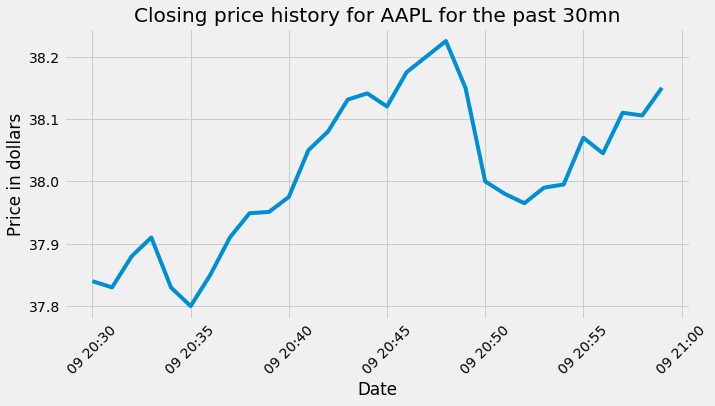

In [40]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Closing price')
plt.title('Closing price history for AAPL for the past 30mn')
plt.xlabel('Date')
plt.ylabel('Price in dollars')
plt.xticks(rotation=45)
plt.show()

## MACD to know when to buy and sell

In [41]:
ShortEMA = data.Close.ewm(span=12,adjust=False).mean()
LongEMA = data.Close.ewm(span=26,adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

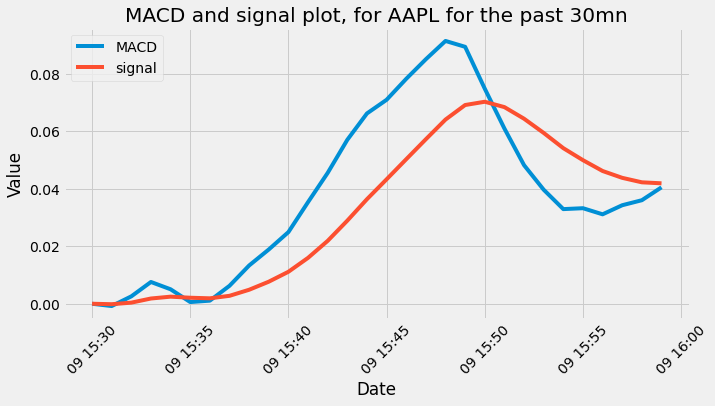

In [42]:
plt.figure(figsize=(10,5))
plt.plot(data.index, MACD, label='MACD')
plt.plot(data.index, signal, label='signal')
plt.title('MACD and signal plot, for AAPL for the past 30mn')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [43]:
data['MACD']=MACD
data['signal']=signal    

In [44]:
data

,Open,High,Low,Close,Adj Close,Volume,MACD,signal
Datetime,,,,,,,,
2021-02-09 15:30:00-05:00,37.740002,37.840000,37.740002,37.840000,37.840000,0,0.000000,0.000000
2021-02-09 15:31:00-05:00,37.830002,37.849998,37.770199,37.830002,37.830002,48386,-0.000798,-0.000160
2021-02-09 15:32:00-05:00,37.830002,37.899899,37.825001,37.880001,37.880001,59141,0.002575,0.000387
2021-02-09 15:33:00-05:00,37.889999,37.919998,37.880001,37.910000,37.910000,49580,0.007581,0.001826
2021-02-09 15:34:00-05:00,37.919899,37.939999,37.820000,37.830002,37.830002,65315,0.005036,0.002468
2021-02-09 15:35:00-05:00,37.839901,37.839901,37.770000,37.799999,37.799999,71238,0.000590,0.002093
2021-02-09 15:36:00-05:00,37.796700,37.849998,37.779999,37.849899,37.849899,47753,0.001081,0.001890
2021-02-09 15:37:00-05:00,37.839901,37.919998,37.830101,37.910000,37.910000,71599,0.006248,0.002762
2021-02-09 15:38:00-05:00,37.900002,37.970001,37.881100,37.948898,37.948898,81186,0.013328,0.004875


# Automate our methodology

## Initalizing portfolio and capital

In [45]:
global init_capital
init_capital = 1000

In [46]:
global capital
capital= 1000

In [47]:
portfolio={}
for i in range (0, len(Tickers)):
    portfolio[Tickers[i]]=0

In [48]:
portfolio

{'X': 0, 'DQ': 0, 'RNG': 0}

## Creating functions to get live data and calculate key indicators

In [64]:
#The NY market is opened from 15h30 to 22H FRANCE:
start_time = 16*60  #16h is taken here to start the bot, to have already 30 data points
end_time = 22*60 - 1 #21h59

In [50]:
def for_call():
    if datetime.now().hour*60 +datetime.now().minute not in [start_time, end_time]: # To not do the call at opening and closing of the market
        for ticker in Tickers:
            call(ticker)
    else:
        print("Skipping call due to init or end")

In [51]:
# this function is called at each minute
def call(Ticker):
    global capital
    global portfolio
    #Get data for the last 30mn (to have more then 26 datapoints)
    data = yf.download(tickers=Ticker, period='30m', interval='1m')
    
    #Get the current price
    price=data.tail(1).iloc[0].Close
    time=data.index[0]
    print('START CALL')
    print(datetime.now())
    print('For ticker: '+Ticker+' at '+str(time)+', Price = '+str(price))

    
    #Create the MACD and signal line
    ShortEMA = data.Close.ewm(span=12,adjust=False).mean()
    LongEMA = data.Close.ewm(span=26,adjust=False).mean()
    MACD = ShortEMA - LongEMA
    signal = MACD.ewm(span=9, adjust=False).mean()
    data['MACD']=MACD
    data['signal']=signal
    
    
    #Defining if we buy or sell
   
    last3=data.tail(3)   
    second_to_last=last3.head(1)
    last=last3.head(2).tail(1)
  
    #print(last)
    #print(last)
    #print('Testing MACD')
    print(last3)
    #print('MACD '+str(last.index[0])+' '+str(last.iloc[0]['MACD'])  )
    #print('signal '+str(last.index[0])+' '+str(last.iloc[0]['signal'])  )
    #print('MACD '+str(second_to_last.index[0])+' '+str(second_to_last.iloc[0]['MACD'])  )
    #print('signal '+str(second_to_last.index[0])+' '+str(second_to_last.iloc[0]['signal'])  )
    #print(last.iloc[0]['signal']) 
    #print(second_to_last.iloc[0]['MACD'])  
    #print(second_to_last.iloc[0]['signal']) 
    if (last.iloc[0]['MACD'] > last.iloc[0]['signal'])&(second_to_last.iloc[0]['MACD'] < last.iloc[0]['signal'])&(portfolio[Ticker]==0):#Checking if buy or sell signal      
        Buy(Ticker, price)
        print('END CALL')
    elif (last.iloc[0]['MACD'] < last.iloc[0]['signal'])&(second_to_last.iloc[0]['MACD'] > last.iloc[0]['signal'])&(portfolio[Ticker]!=0):#Checking if buy or sell signal    
        Sell(Ticker, price)
        print('END CALL')
    else:
        print('No stocks bought or sold for '+Ticker)
        print('Capital = '+str(capital))
        print(portfolio)
        print('END CALL')

In [52]:
def for_init_call():
    for ticker in Tickers:
        init_call(ticker)

In [53]:
def init_call(Ticker): #To buy the first time, at 10am (16pm FR)
    #Get data for the last 30mn (to have more then 26 datapoints)
    print('START INIT CALL')
    data = yf.download(tickers=Ticker, period='30m', interval='1m')
    global capital
    global portfolio
    
    #Get the current price
    price=data.tail(1).iloc[0].Close
    time=data.index[0]
    
    print('At initialization, for ticker: '+Ticker+' at '+str(time)+', Price = '+str(price))
    print(datetime.now())
    #Create the MACD and signal line
    ShortEMA = data.Close.ewm(span=12,adjust=False).mean()
    LongEMA = data.Close.ewm(span=26,adjust=False).mean()
    MACD = ShortEMA - LongEMA
    signal = MACD.ewm(span=9, adjust=False).mean()
    data['MACD']=MACD
    data['signal']=signal
        
    last3=data.tail(3)   
    #second_to_last=last3.head(1)
    last=last3.head(2).tail(1)
    
    if last.iloc[0]['MACD'] > last.iloc[0]['signal']:
        Buy(Ticker, price)
        print('END INIT CALL')
    #elif last.iloc[0]['MACD'] < last.iloc[0]['signal']:
     #   Sell(Ticker, price) 
     #   print('END INIT CALL')
    else:
        print('No stocks bought or sold for '+Ticker)
        print('Capital = '+str(capital))
        print(portfolio)
        print('END INIT CALL')

## Create Buy and Sell functions

In [54]:
def Buy(Ticker, price):
    #Defining how many actions are not bought yet
    global capital
    global portfolio
    count=0
    for key, value in portfolio.items():
        if value == 0:
            count=count+1
    
    #Defining how much we will invest in that ticker
    if count==0:
        budget=capital
    else:
        budget=capital/count
    
    #New caiptal
    capital= capital - budget
    
    #Update portfolio
    shares=budget/price
    portfolio[Ticker]=portfolio[Ticker]+shares
    print('BUY '+Ticker)
    print('Buying '+str(shares)+' shares, at the price of '+str(price)+' per share, for a total amount of '+str(budget))
    print(portfolio)
    print("Capital ="+str(capital))   

In [55]:
def Sell(Ticker, price):
    global capital
    global portfolio
    share=portfolio[Ticker]
    amount=price * share
    capital=capital+amount
    portfolio[Ticker]=0
    
    print('SELL '+Ticker)
    print('Selling '+str(share)+' shares, at the price of '+str(price)+' per share, for a total amount of '+str(amount))
    print(portfolio)
    print("Capital = "+str(capital))  

In [56]:
def Sell_all():
    global capital
    global portfolio
    print("SELL ALL")
    for key, value in portfolio.items():     
        data = yf.download(tickers=key, period='1m', interval='1m')
        price=data.tail(1).iloc[0].Close
        amount=value*price
        capital=capital+amount
        portfolio[key]=0
    print('AT THE END OF THE DAY, IN 6 HOURS: ')
    print(portfolio)
    print('Init capital = '+str(init_capital))
    print("Final Capital = "+str(capital))  

## Scheduling calls

In [57]:
import schedule 
import time 

In [58]:
#Get the NY time
from datetime import datetime
import pytz
now = datetime.now(tz=pytz.timezone('US/Eastern'))
now=now.strftime("%H:%M:%S")
now

'08:35:00'

In [67]:
#Scheduling the tasks
schedule.every().day.at("16:00").do(for_init_call) #Initializing 30mns after the opening of the market (10am NY)
schedule.every().minutes.at(":30").do(for_call) #Calling at each minute and 1 sec
schedule.every().day.at("21:59").do(Sell_all) #At the end of the day, sell everything

Every 1 day at 21:59:00 do Sell_all() (last run: [never], next run: 2021-02-10 21:59:00)

In [66]:
#schedule.clear()

# Final bot

In [ ]:
while datetime.now().hour*60 +datetime.now().minute>=start_time and datetime.now().hour*60 +datetime.now().minute<=end_time: 
    schedule.run_pending() 
    time.sleep(1)

Skipping call due to init or end
START INIT CALL
[*********************100%***********************]  1 of 1 completed
At initialization, for ticker: X at 2021-02-10 09:32:00-05:00, Price = 16.53969955444336
2021-02-10 16:00:02.574262
BUY X
Buying 20.15353013131269 shares, at the price of 16.53969955444336 per share, for a total amount of 333.3333333333333
{'X': 20.15353013131269, 'DQ': 0, 'RNG': 0}
Capital =666.6666666666667
END INIT CALL
START INIT CALL
[*********************100%***********************]  1 of 1 completed
At initialization, for ticker: DQ at 2021-02-10 09:32:00-05:00, Price = 128.6999969482422
2021-02-10 16:00:02.745204
BUY DQ
Buying 2.5900026514172043 shares, at the price of 128.6999969482422 per share, for a total amount of 333.33333333333337
{'X': 20.15353013131269, 'DQ': 2.5900026514172043, 'RNG': 0}
Capital =333.33333333333337
END INIT CALL
START INIT CALL
[*********************100%***********************]  1 of 1 completed
At initialization, for ticker: RNG at 20

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:03:30.598981
For ticker: DQ at 2021-02-10 09:35:00-05:00, Price = 128.81500244140625
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:01:00-05:00  129.339996  129.539993  129.080002  129.080002   
2021-02-10 10:02:00-05:00  129.080002  129.289993  128.990005  129.095001   
2021-02-10 10:03:25-05:00  128.815002  128.815002  128.815002  128.815002   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:01:00-05:00  129.080002   10200  0.768194  0.847228  
2021-02-10 10:02:00-05:00  129.095001   13352  0.740031  0.825788  
2021-02-10 10:03:25-05:00  128.815002       0  0.687197  0.798070  
No stocks bought or sold for DQ
Capital = 0.0
{'X': 20.15353013131269, 'DQ': 2.5900026514172043

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:06:31.073031
For ticker: X at 2021-02-10 09:38:00-05:00, Price = 16.52989959716797
                                Open       High        Low      Close  \
Datetime                                                                
2021-02-10 10:04:00-05:00  16.535999  16.549999  16.530001  16.530001   
2021-02-10 10:05:00-05:00  16.520000  16.549900  16.510000  16.511600   
2021-02-10 10:06:28-05:00  16.529900  16.529900  16.529900  16.529900   

                           Adj Close  Volume      MACD    signal  
Datetime                                                          
2021-02-10 10:04:00-05:00  16.530001   31150 -0.037801 -0.035211  
2021-02-10 10:05:00-05:00  16.511600   30813 -0.038673 -0.035903  
2021-02-10 10:06:28-05:00  16.529900       0 -0.037457 -0.036214  
No stocks bought or sold for X
Capital = 0.0
{'X': 20.15353013131269, 'DQ': 2.5900026514172043, 'RNG': 0.760609560969885}


[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:08:31.409772
For ticker: RNG at 2021-02-10 09:41:00-05:00, Price = 440.82000732421875
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:05:00-05:00  441.660004  441.660004  440.869995  440.869995   
2021-02-10 10:06:00-05:00  441.410004  441.410004  441.339996  441.339996   
2021-02-10 10:08:25-05:00  440.820007  440.820007  440.820007  440.820007   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:05:00-05:00  440.869995    2869  1.125022  0.827123  
2021-02-10 10:06:00-05:00  441.339996    1998  1.242007  0.910099  
2021-02-10 10:08:25-05:00  440.820007       0  1.278027  0.983685  
No stocks bought or sold for RNG
Capital = 0.0
{'X': 20.15353013131269, 'DQ': 2.59000265141720

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:11:30.944091
For ticker: DQ at 2021-02-10 09:43:00-05:00, Price = 128.7899932861328
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:09:00-05:00  129.624695  129.669998  129.169998  129.169998   
2021-02-10 10:10:00-05:00  129.059998  129.059998  128.630005  128.716003   
2021-02-10 10:11:27-05:00  128.789993  128.789993  128.789993  128.789993   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:09:00-05:00  129.169998    5564  0.481491  0.524945  
2021-02-10 10:10:00-05:00  128.716003    9298  0.412165  0.502389  
2021-02-10 10:11:27-05:00  128.789993       0  0.359055  0.473722  
No stocks bought or sold for DQ
Capital = 0.0
{'X': 20.15353013131269, 'DQ': 2.5900026514172043,

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:14:30.873753
For ticker: X at 2021-02-10 09:46:00-05:00, Price = 16.440000534057617
                                Open       High        Low      Close  \
Datetime                                                                
2021-02-10 10:12:00-05:00  16.555000  16.558300  16.530001  16.530001   
2021-02-10 10:13:00-05:00  16.525000  16.525000  16.450001  16.459999   
2021-02-10 10:14:28-05:00  16.440001  16.440001  16.440001  16.440001   

                           Adj Close  Volume      MACD    signal  
Datetime                                                          
2021-02-10 10:12:00-05:00  16.530001   33327 -0.017157 -0.020246  
2021-02-10 10:13:00-05:00  16.459999  157760 -0.022610 -0.020719  
2021-02-10 10:14:28-05:00  16.440001       0 -0.028220 -0.022219  
SELL X
Selling 20.15353013131269 shares, at the price of 16.440000534057617 per share, for a total amount of 331.32404612

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:16:30.915376
For ticker: RNG at 2021-02-10 09:48:00-05:00, Price = 436.0
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:14:00-05:00  436.679993  436.679993  436.674988  436.674988   
2021-02-10 10:15:00-05:00  436.625000  436.625000  436.625000  436.625000   
2021-02-10 10:16:12-05:00  436.000000  436.000000  436.000000  436.000000   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:14:00-05:00  436.674988    1872  0.095515  0.464728  
2021-02-10 10:15:00-05:00  436.625000     666 -0.048136  0.362155  
2021-02-10 10:16:12-05:00  436.000000       0 -0.209991  0.247726  
No stocks bought or sold for RNG
Capital = 663.9652219693422
{'X': 0, 'DQ': 2.5900026514172043, 'RNG': 0}
E

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:19:30.755737
For ticker: RNG at 2021-02-10 09:51:00-05:00, Price = 435.3900146484375
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:17:00-05:00  435.529999  435.890015  435.529999  435.779999   
2021-02-10 10:18:00-05:00  435.510010  435.510010  435.000000  435.000000   
2021-02-10 10:19:22-05:00  435.390015  435.390015  435.390015  435.390015   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:17:00-05:00  435.779999    2462 -0.337826  0.164337  
2021-02-10 10:18:00-05:00  435.000000    5468 -0.509571  0.029555  
2021-02-10 10:19:22-05:00  435.390015       0 -0.607210 -0.097798  
No stocks bought or sold for RNG
Capital = 997.2597068437165
{'X': 0, 'DQ': 0, 'RNG': 0}
END CA

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:22:30.562291
For ticker: RNG at 2021-02-10 09:54:00-05:00, Price = 430.9949951171875
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:20:00-05:00  434.285004  434.285004  433.179688  433.179688   
2021-02-10 10:21:00-05:00  433.480011  434.130005  432.047485  432.047485   
2021-02-10 10:22:19-05:00  430.994995  430.994995  430.994995  430.994995   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:20:00-05:00  433.179688    5715 -1.109709 -0.517656  
2021-02-10 10:21:00-05:00  432.047485   11615 -1.358260 -0.685777  
2021-02-10 10:22:19-05:00  430.994995       0 -1.621475 -0.872917  
No stocks bought or sold for RNG
Capital = 997.2597068437165
{'X': 0, 'DQ': 0, 'RNG': 0}
END CA

2021-02-10 10:25:24-05:00  121.785004       0 -1.639338 -0.804548  
No stocks bought or sold for DQ
Capital = 997.2597068437165
{'X': 0, 'DQ': 0, 'RNG': 0}
END CALL
[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:25:31.309331
For ticker: RNG at 2021-02-10 09:57:00-05:00, Price = 426.8550109863281
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:23:00-05:00  430.420013  430.424988  427.010010  427.010010   
2021-02-10 10:24:00-05:00  426.679993  427.029999  426.149994  426.540009   
2021-02-10 10:25:18-05:00  426.855011  426.855011  426.855011  426.855011   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:23:00-05:00  427.010010    8534 -2.007342 -0.944038  
2021-02-10 10:24:00-05:00  426.540009    6777 -2.427226 -1.240675 

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:28:31.090187
For ticker: RNG at 2021-02-10 10:00:00-05:00, Price = 431.0154113769531
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:25:00-05:00  426.899994  428.829987  426.855011  428.829987   
2021-02-10 10:26:00-05:00  429.480011  429.615997  429.220001  429.220001   
2021-02-10 10:27:29-05:00  431.015411  431.015411  431.015411  431.015411   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:25:00-05:00  428.829987    3576 -2.846969 -1.900150  
2021-02-10 10:26:00-05:00  429.220001    3629 -2.859186 -2.091958  
2021-02-10 10:27:29-05:00  431.015411       0 -2.692951 -2.212156  
No stocks bought or sold for RNG
Capital = 997.2597068437165
{'X': 0, 'DQ': 0, 'RNG': 0}
END CA

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:31:30.695358
For ticker: DQ at 2021-02-10 10:03:00-05:00, Price = 123.05999755859375
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:29:00-05:00  125.320000  125.500000  124.690002  124.690002   
2021-02-10 10:30:00-05:00  124.904999  124.904999  124.000000  124.019997   
2021-02-10 10:31:22-05:00  123.059998  123.059998  123.059998  123.059998   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:29:00-05:00  124.690002    4522 -1.256583 -1.129093  
2021-02-10 10:30:00-05:00  124.019997    3859 -1.252394 -1.153753  
2021-02-10 10:31:22-05:00  123.059998       0 -1.311420 -1.185287  
No stocks bought or sold for DQ
Capital = 332.4199022812388
{'X': 20.263327544499603, 'DQ': 0, 

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:34:31.124670
For ticker: X at 2021-02-10 10:06:00-05:00, Price = 16.325000762939453
                                Open       High        Low      Close  \
Datetime                                                                
2021-02-10 10:32:00-05:00  16.379999  16.389900  16.340000  16.340000   
2021-02-10 10:33:00-05:00  16.344999  16.350000  16.309999  16.330099   
2021-02-10 10:34:29-05:00  16.325001  16.325001  16.325001  16.325001   

                           Adj Close  Volume      MACD    signal  
Datetime                                                          
2021-02-10 10:32:00-05:00  16.340000   22166 -0.031174 -0.031895  
2021-02-10 10:33:00-05:00  16.330099   66365 -0.034066 -0.032329  
2021-02-10 10:34:29-05:00  16.325001       0 -0.036350 -0.033133  
No stocks bought or sold for X
Capital = 663.4213391690093
{'X': 0, 'DQ': 0, 'RNG': 0.7695172599823241}
END CALL
[*******

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:37:30.411749
For ticker: X at 2021-02-10 10:09:00-05:00, Price = 16.332500457763672
                                Open       High        Low      Close  \
Datetime                                                                
2021-02-10 10:35:00-05:00  16.320000  16.389999  16.315001  16.370001   
2021-02-10 10:36:00-05:00  16.360001  16.400000  16.349501  16.370001   
2021-02-10 10:37:21-05:00  16.332500  16.332500  16.332500  16.332500   

                           Adj Close  Volume      MACD    signal  
Datetime                                                          
2021-02-10 10:35:00-05:00  16.370001   45767 -0.037427 -0.036697  
2021-02-10 10:36:00-05:00  16.370001   61294 -0.034932 -0.036344  
2021-02-10 10:37:21-05:00  16.332500       0 -0.035570 -0.036189  
BUY X
Buying 20.309852152909365 shares, at the price of 16.332500457763672 per share, for a total amount of 331.710669584

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:39:30.451081
For ticker: RNG at 2021-02-10 10:11:00-05:00, Price = 433.2099914550781
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:36:00-05:00  432.279999  432.359985  432.279999  432.359985   
2021-02-10 10:37:00-05:00  432.000000  432.000000  432.000000  432.000000   
2021-02-10 10:38:46-05:00  433.209991  433.209991  433.209991  433.209991   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:36:00-05:00  432.359985    1487 -1.202386 -1.499262  
2021-02-10 10:37:00-05:00  432.000000    1023 -1.059041 -1.411218  
2021-02-10 10:38:46-05:00  433.209991       0 -0.838141 -1.296603  
No stocks bought or sold for RNG
Capital = 331.0252012277127
{'X': 0, 'DQ': 2.697182369212504, 

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:42:30.898595
For ticker: DQ at 2021-02-10 10:14:00-05:00, Price = 122.01000213623047
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:40:00-05:00  122.209999  122.845001  122.209999  122.750000   
2021-02-10 10:41:00-05:00  122.805000  122.930000  122.379997  122.379997   
2021-02-10 10:42:27-05:00  122.010002  122.010002  122.010002  122.010002   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:40:00-05:00  122.750000   10619 -1.323583 -1.384364  
2021-02-10 10:41:00-05:00  122.379997    6455 -1.298575 -1.367206  
2021-02-10 10:42:27-05:00  122.010002       0 -1.293699 -1.352504  
No stocks bought or sold for DQ
Capital = 331.0252012277127
{'X': 0, 'DQ': 2.697182369212504, '

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:45:30.444786
For ticker: X at 2021-02-10 10:17:00-05:00, Price = 16.200000762939453
                                Open       High        Low      Close  \
Datetime                                                                
2021-02-10 10:43:00-05:00  16.254999  16.270000  16.225000  16.225000   
2021-02-10 10:44:00-05:00  16.227501  16.227501  16.174999  16.190001   
2021-02-10 10:45:28-05:00  16.200001  16.200001  16.200001  16.200001   

                           Adj Close  Volume      MACD    signal  
Datetime                                                          
2021-02-10 10:43:00-05:00  16.225000   75204 -0.039773 -0.030390  
2021-02-10 10:44:00-05:00  16.190001   98613 -0.045912 -0.033494  
2021-02-10 10:45:28-05:00  16.200001       0 -0.049400 -0.036676  
No stocks bought or sold for X
Capital = 653.3924289417291
{'X': 0, 'DQ': 0, 'RNG': 0.7695172599823241}
END CALL
[*******

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:48:31.024016
For ticker: X at 2021-02-10 10:20:00-05:00, Price = 16.21500015258789
                                Open    High        Low      Close  Adj Close  \
Datetime                                                                        
2021-02-10 10:46:00-05:00  16.200001  16.230  16.190001  16.190001  16.190001   
2021-02-10 10:47:00-05:00  16.190001  16.215  16.180000  16.190001  16.190001   
2021-02-10 10:48:29-05:00  16.215000  16.215  16.215000  16.215000  16.215000   

                           Volume      MACD    signal  
Datetime                                               
2021-02-10 10:46:00-05:00   47250 -0.047239 -0.032941  
2021-02-10 10:47:00-05:00   71618 -0.049248 -0.036202  
2021-02-10 10:48:29-05:00       0 -0.048266 -0.038615  
No stocks bought or sold for X
Capital = 653.3924289417291
{'X': 0, 'DQ': 0, 'RNG': 0.7695172599823241}
END CALL
[*********************10

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:51:30.203379
For ticker: X at 2021-02-10 10:23:00-05:00, Price = 16.260000228881836
                                Open   High        Low  Close  Adj Close  \
Datetime                                                                   
2021-02-10 10:49:00-05:00  16.235001  16.26  16.220100  16.25      16.25   
2021-02-10 10:50:00-05:00  16.247900  16.25  16.219999  16.24      16.24   
2021-02-10 10:51:28-05:00  16.260000  16.26  16.260000  16.26      16.26   

                           Volume      MACD    signal  
Datetime                                               
2021-02-10 10:49:00-05:00   33211 -0.031663 -0.024643  
2021-02-10 10:50:00-05:00   27926 -0.029849 -0.025684  
2021-02-10 10:51:28-05:00       0 -0.026491 -0.025845  
No stocks bought or sold for X
Capital = 982.8112186057974
{'X': 0, 'DQ': 0, 'RNG': 0}
END CALL
[*********************100%***********************]  1 of 1 comple

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:54:30.752114
For ticker: X at 2021-02-10 10:26:00-05:00, Price = 16.350000381469727
                                Open       High        Low      Close  \
Datetime                                                                
2021-02-10 10:52:00-05:00  16.309999  16.344999  16.290001  16.344999   
2021-02-10 10:53:00-05:00  16.350000  16.370001  16.325001  16.369499   
2021-02-10 10:54:28-05:00  16.350000  16.350000  16.350000  16.350000   

                           Adj Close  Volume      MACD    signal  
Datetime                                                          
2021-02-10 10:52:00-05:00  16.344999   58231 -0.027453 -0.040683  
2021-02-10 10:53:00-05:00  16.369499   36811 -0.017462 -0.036039  
2021-02-10 10:54:28-05:00  16.350000       0 -0.010992 -0.031029  
No stocks bought or sold for X
Capital = 655.2074790705317
{'X': 20.07339060106506, 'DQ': 0, 'RNG': 0}
END CALL
[********

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:56:30.874338
For ticker: RNG at 2021-02-10 10:28:00-05:00, Price = 429.3599853515625
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:52:00-05:00  428.394989  428.829987  428.394989  428.730011   
2021-02-10 10:53:00-05:00  428.970001  429.369995  428.970001  429.369995   
2021-02-10 10:55:16-05:00  429.359985  429.359985  429.359985  429.359985   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:52:00-05:00  428.730011    1234 -1.154831 -0.872975  
2021-02-10 10:53:00-05:00  429.369995     887 -1.044047 -0.907189  
2021-02-10 10:55:16-05:00  429.359985       0 -0.946152 -0.914982  
No stocks bought or sold for RNG
Capital = 327.60373953526585
{'X': 20.07339060106506, 'DQ': 2.

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 16:59:31.265344
For ticker: DQ at 2021-02-10 10:31:00-05:00, Price = 121.81999969482422
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-10 10:57:00-05:00  121.830002  121.900002  121.800003  121.820000   
2021-02-10 10:58:00-05:00  121.769997  121.919998  121.760002  121.904099   
2021-02-10 10:59:30-05:00  121.820000  121.820000  121.820000  121.820000   

                            Adj Close  Volume      MACD    signal  
Datetime                                                           
2021-02-10 10:57:00-05:00  121.820000    2604 -0.367639 -0.791349  
2021-02-10 10:58:00-05:00  121.904099    2571 -0.256580 -0.684395  
2021-02-10 10:59:30-05:00  121.820000       0 -0.173353 -0.582186  
No stocks bought or sold for DQ
Capital = 327.60373953526585
{'X': 20.07339060106506, 'DQ': 2.7

[*********************100%***********************]  1 of 1 completed
START CALL
2021-02-10 17:02:30.938101
For ticker: X at 2021-02-10 10:34:00-05:00, Price = 16.43000030517578
                             Open   High        Low   Close  Adj Close  \
Datetime                                                                 
2021-02-10 11:00:00-05:00  16.400  16.42  16.389999  16.395     16.395   
2021-02-10 11:01:00-05:00  16.395  16.41  16.385000  16.400     16.400   
2021-02-10 11:02:28-05:00  16.430  16.43  16.430000  16.430     16.430   

                           Volume      MACD    signal  
Datetime                                               
2021-02-10 11:00:00-05:00   28619  0.027715  0.012469  
2021-02-10 11:01:00-05:00   13840  0.029888  0.015953  
2021-02-10 11:02:28-05:00       0  0.033643  0.019491  
No stocks bought or sold for X
Capital = 0.0
{'X': 20.07339060106506, 'DQ': 2.703001219341344, 'RNG': 0.7627511013321628}
END CALL
[*********************100%***************

Exception in thread Thread-196:
Traceback (most recent call last):
  File "C:\Users\louis\anaconda3\lib\site-packages\urllib3\connection.py", line 157, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\louis\anaconda3\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\louis\anaconda3\lib\socket.py", line 752, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\louis\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "C:\Users\louis\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 376, in _make_request
    self._validate_conn(conn)
  File "C:\Users\louis\anacond

In [62]:
#First attempt: 08 février 2021. 
#Initial capital: 1000. Final capital: 993.1277610857343. Duration: 3H30.

#Second attempt: 09 février 2021. 
#Improvement of the bot: no more double buying or selling. 
#Initial capital: 1000. Final capital: 1003.8716249651623 . Duration: 5H.